In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((192, 4))

In [3]:
mice.setup_func_data()

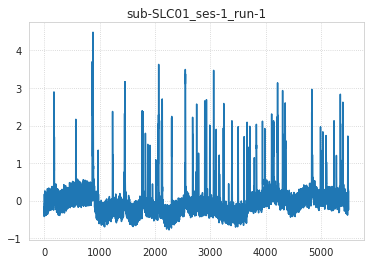

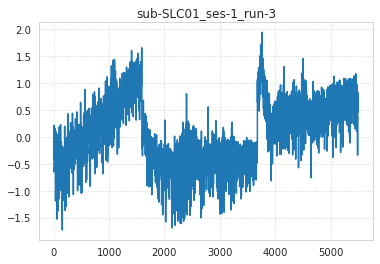

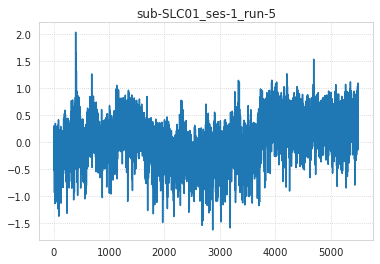

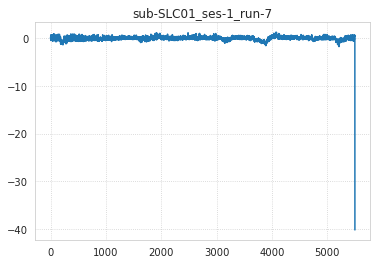

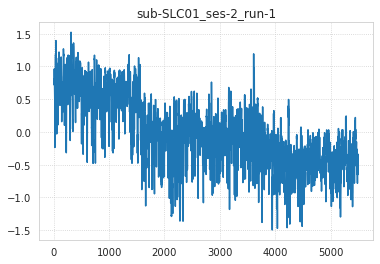

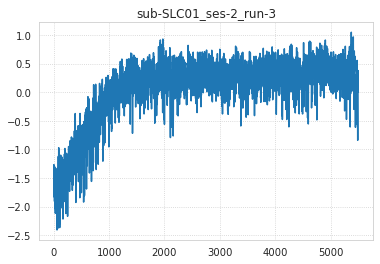

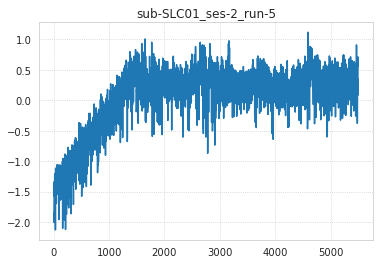

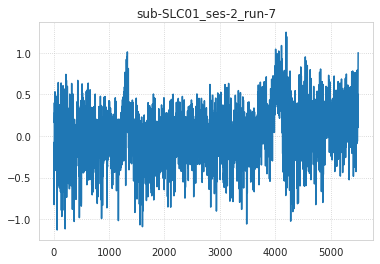

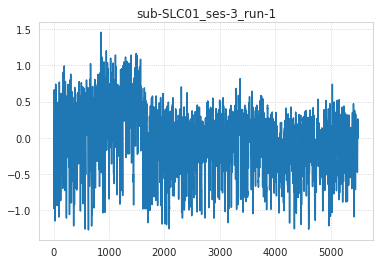

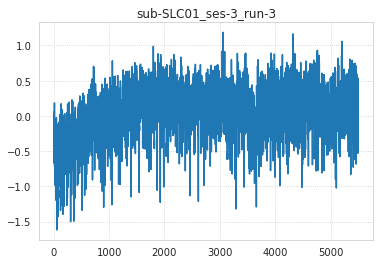

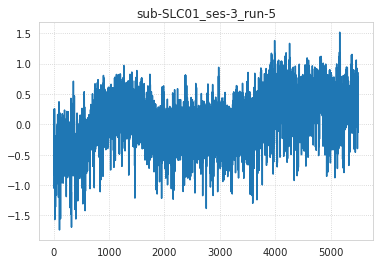

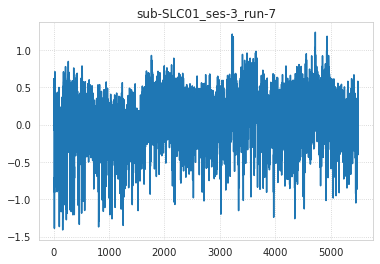

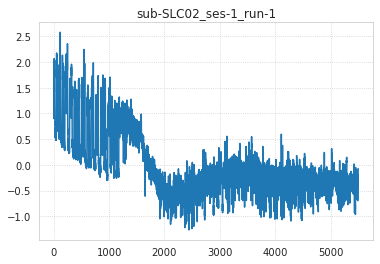

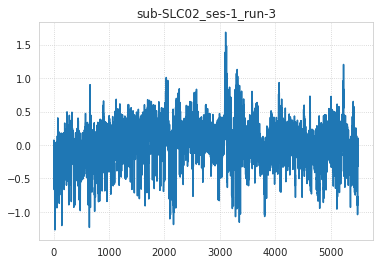

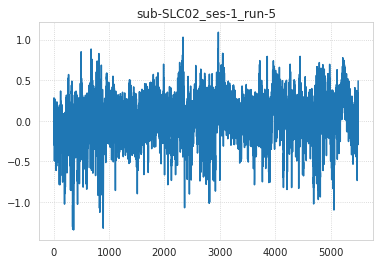

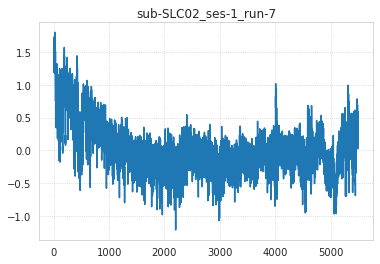

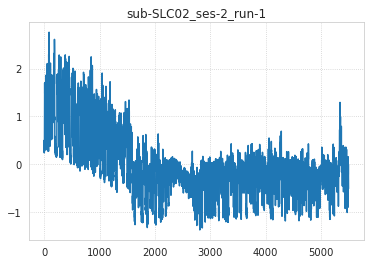

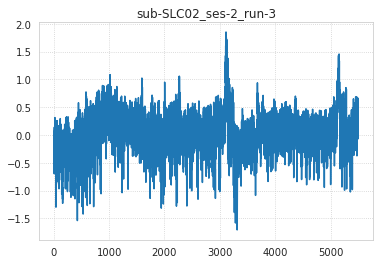

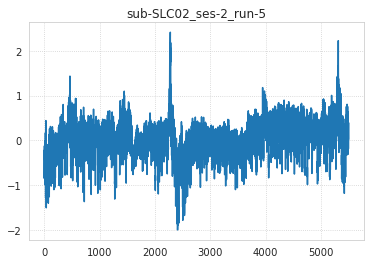

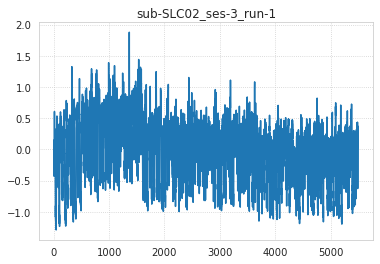

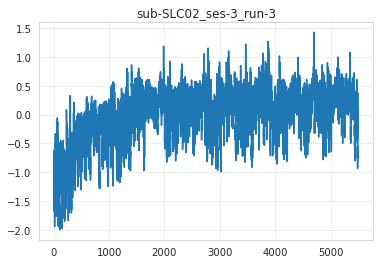

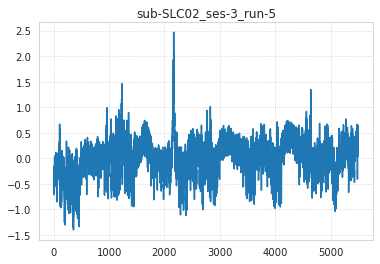

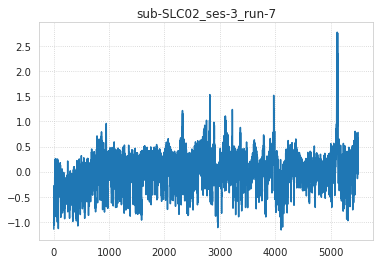

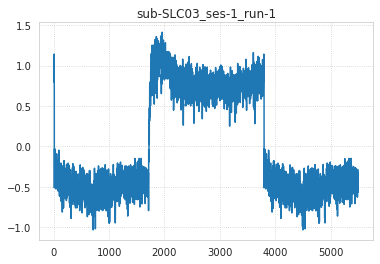

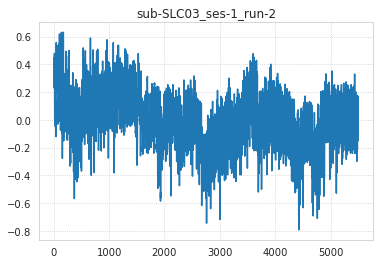

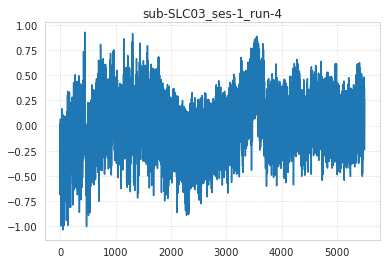

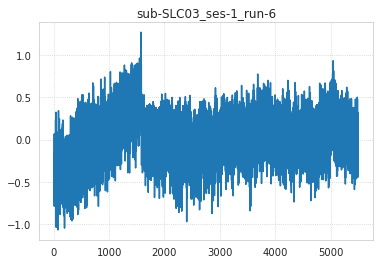

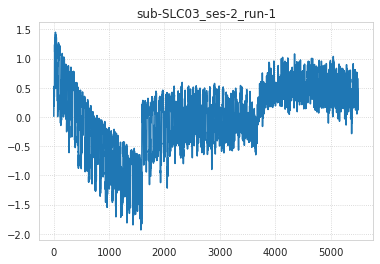

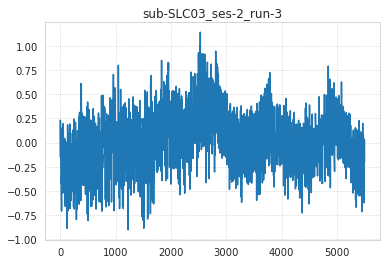

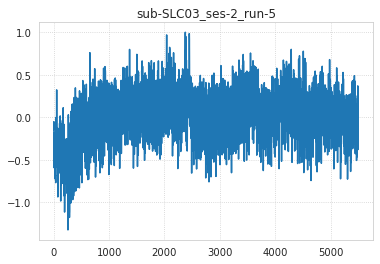

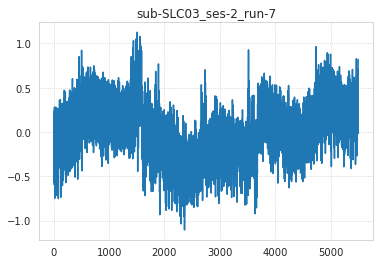

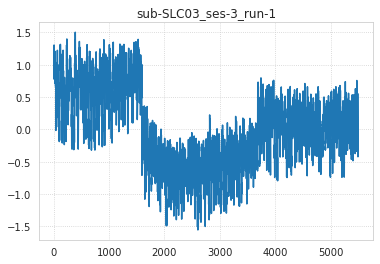

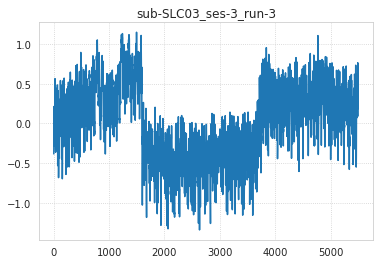

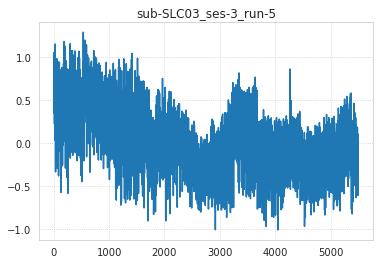

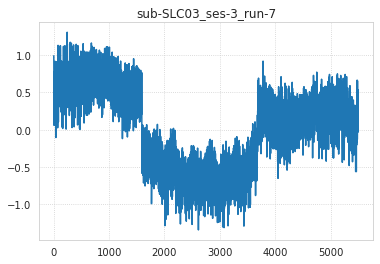

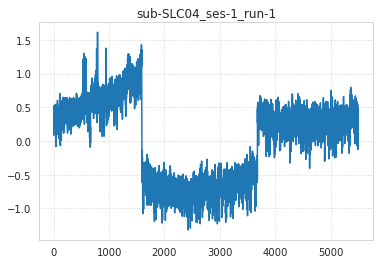

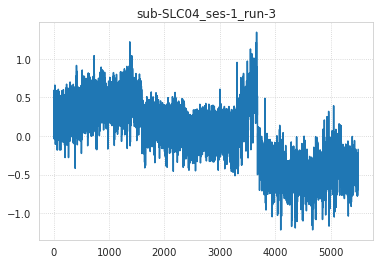

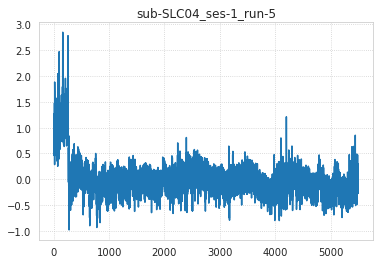

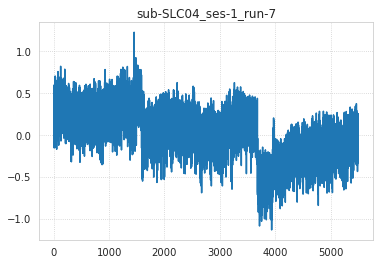

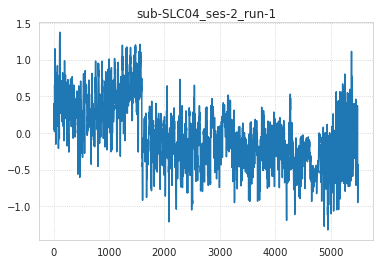

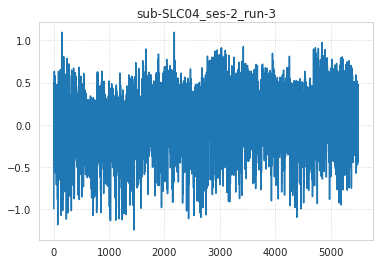

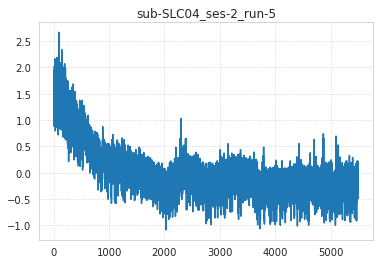

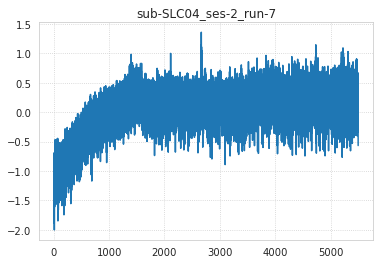

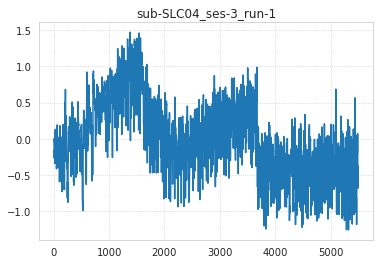

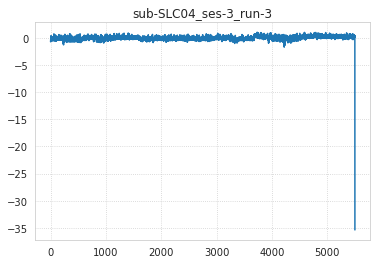

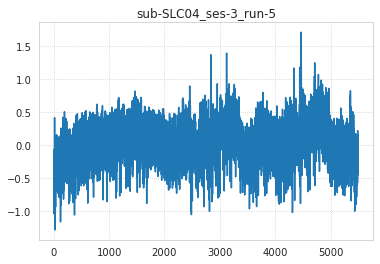

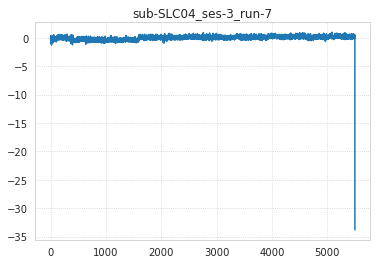

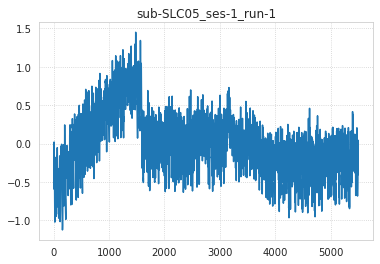

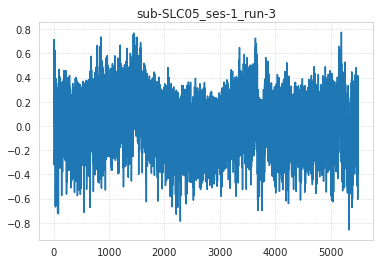

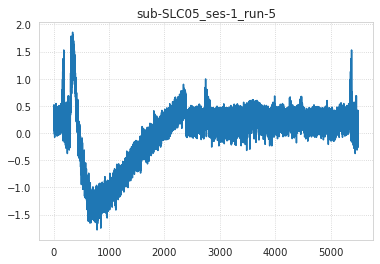

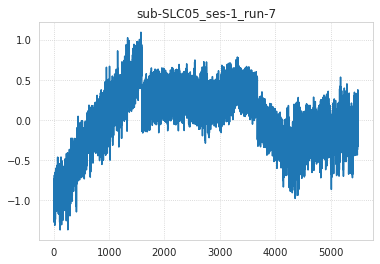

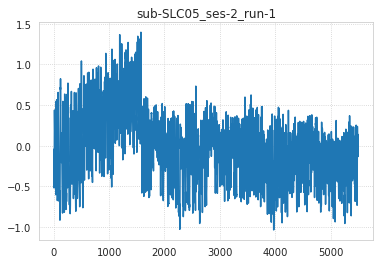

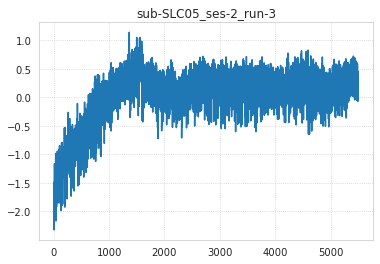

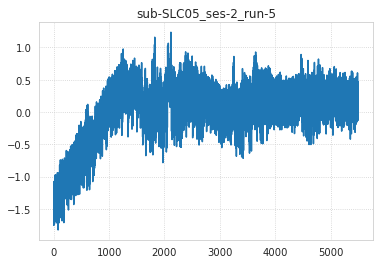

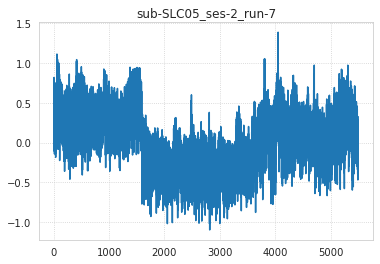

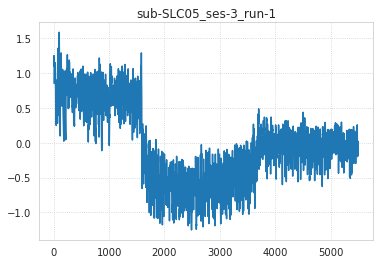

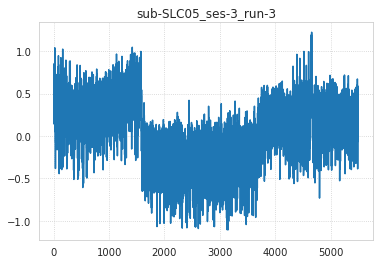

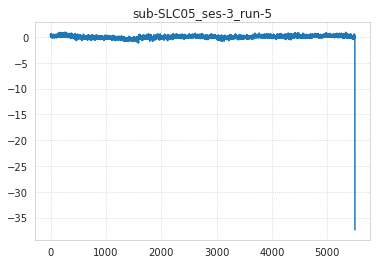

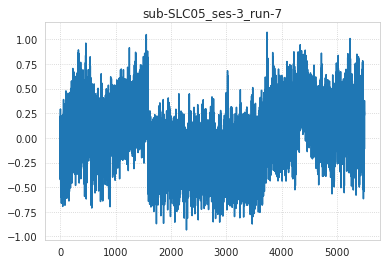

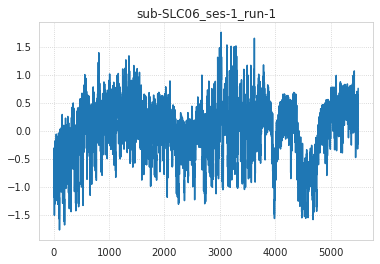

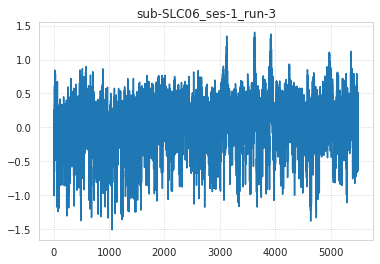

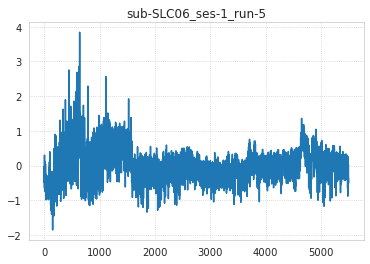

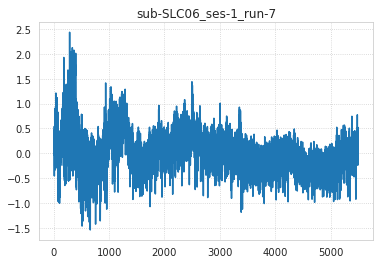

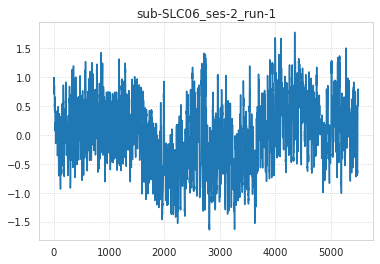

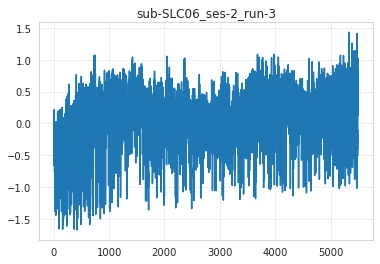

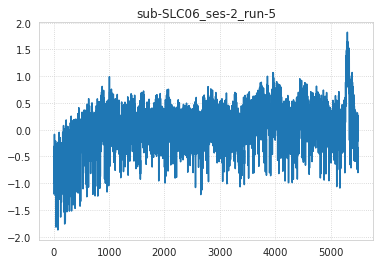

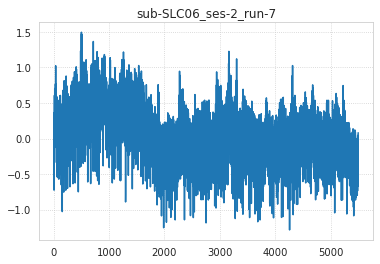

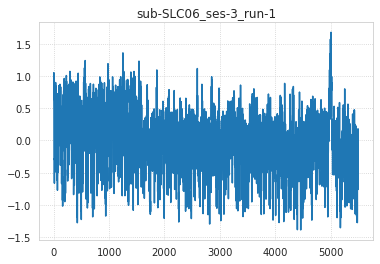

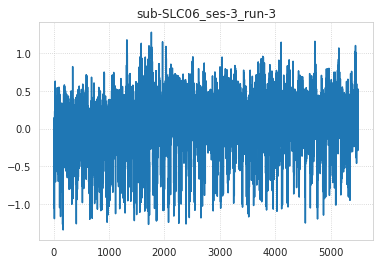

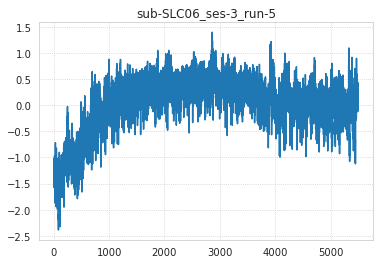

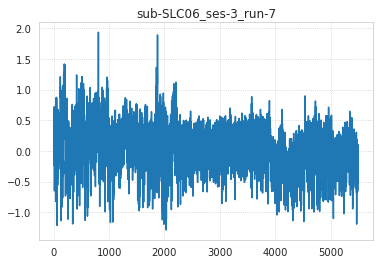

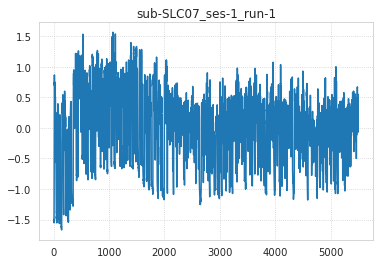

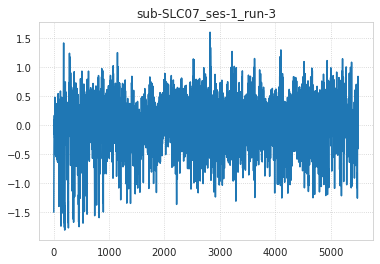

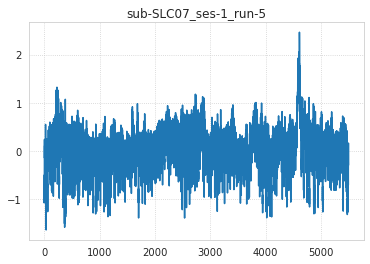

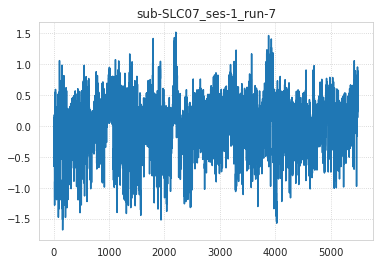

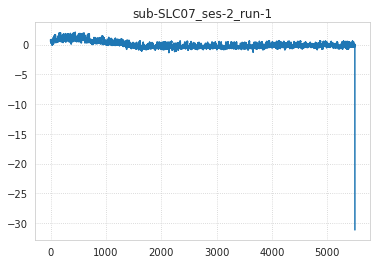

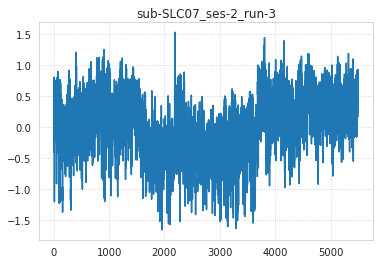

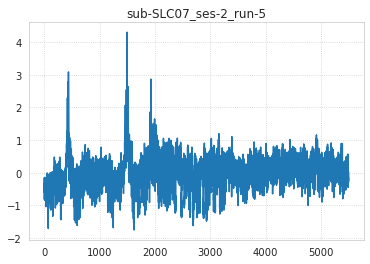

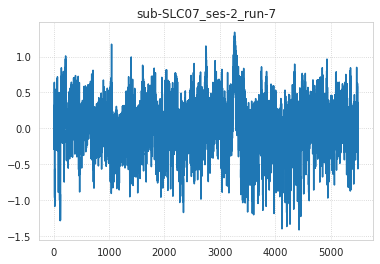

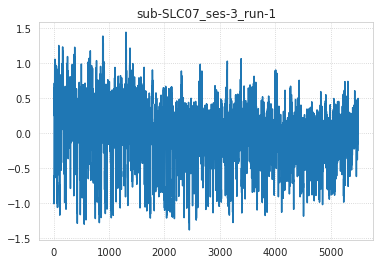

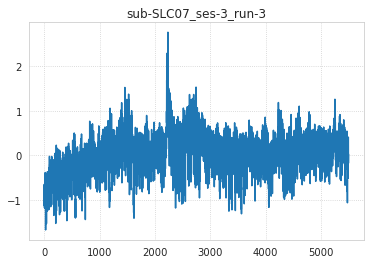

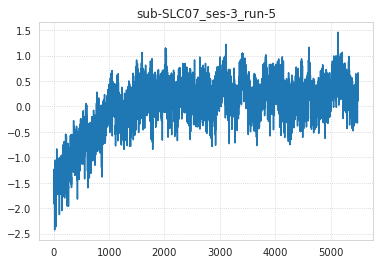

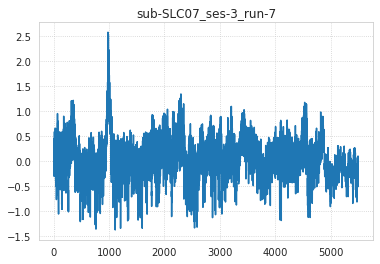

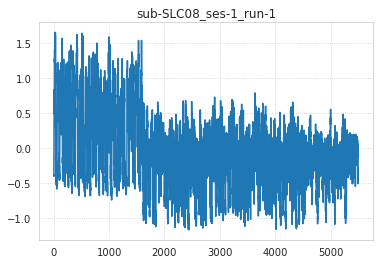

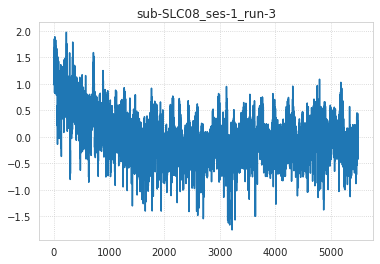

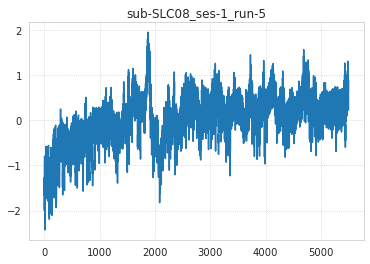

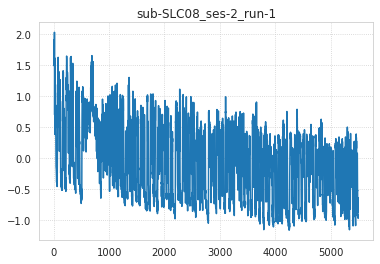

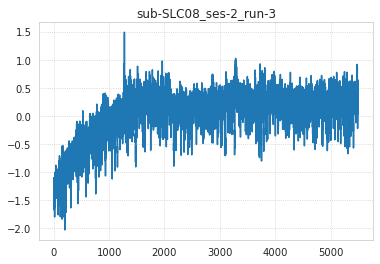

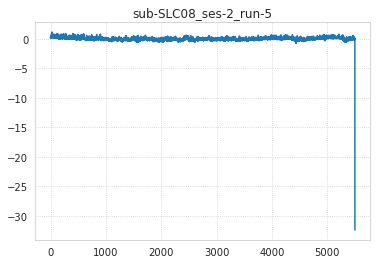

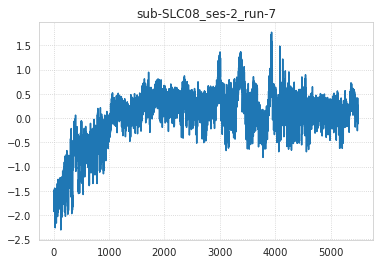

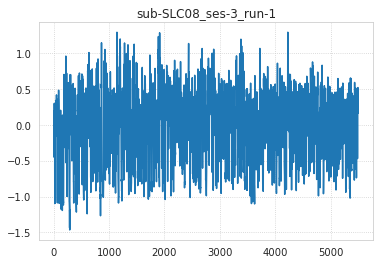

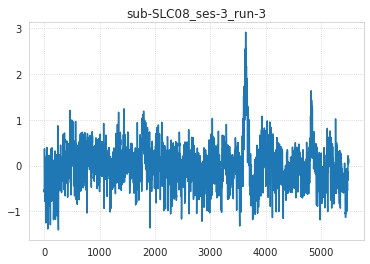

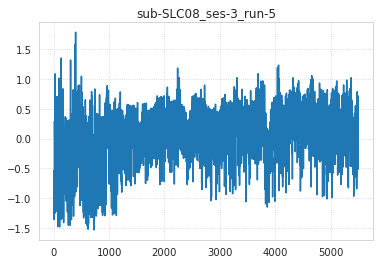

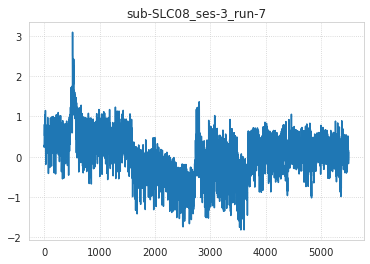

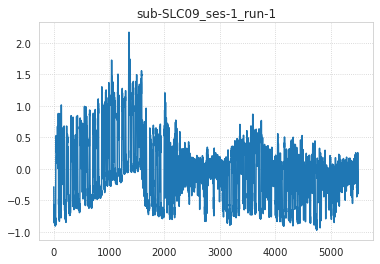

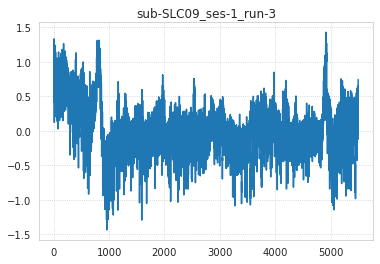

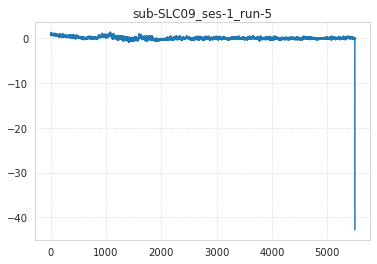

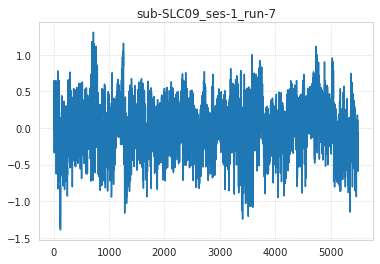

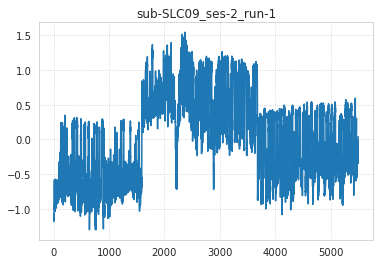

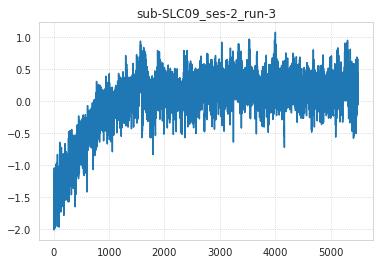

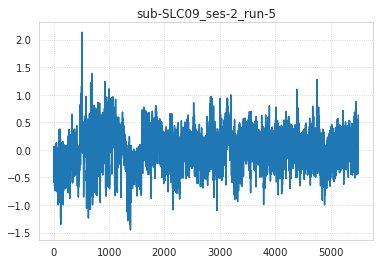

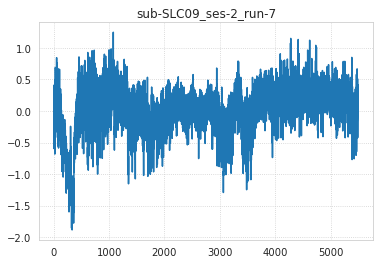

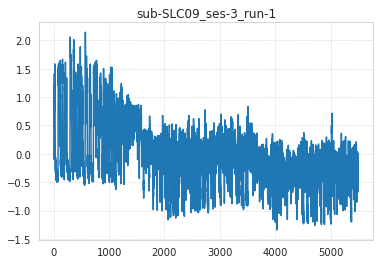

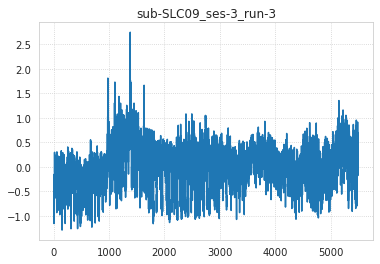

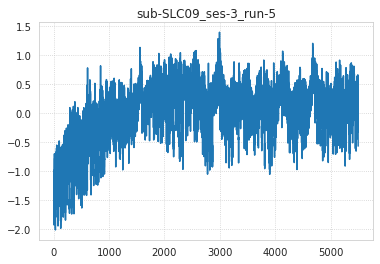

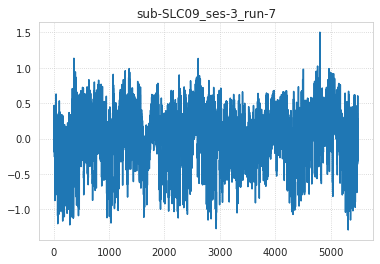

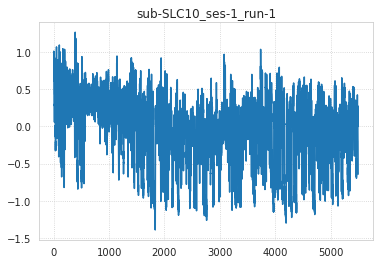

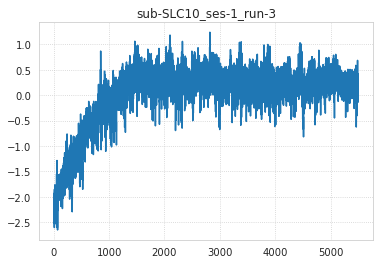

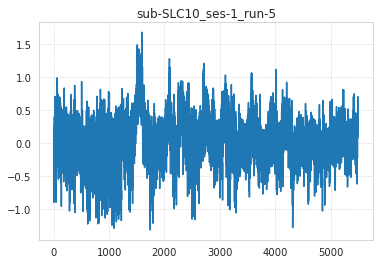

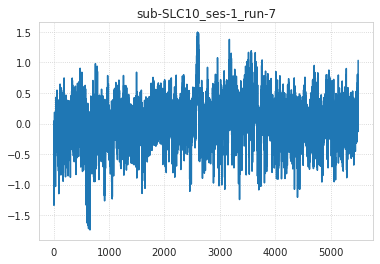

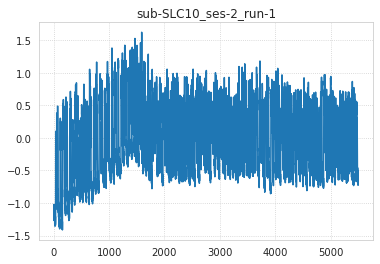

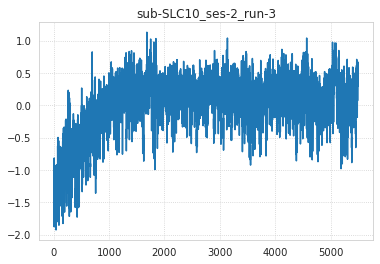

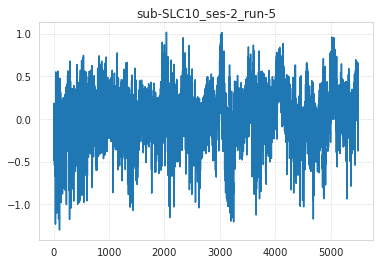

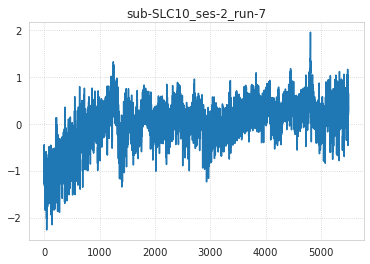

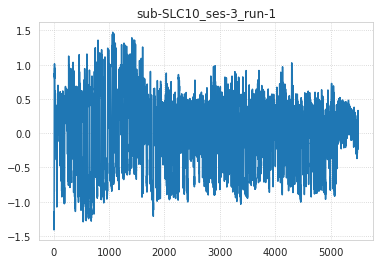

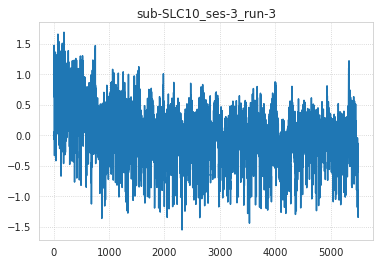

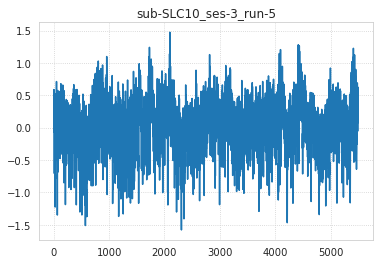

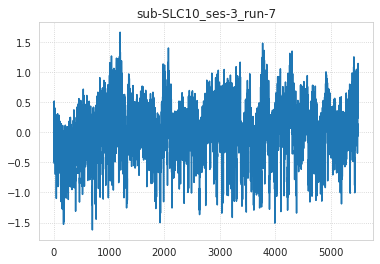

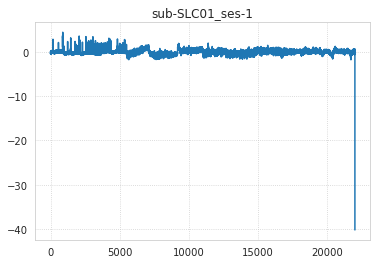

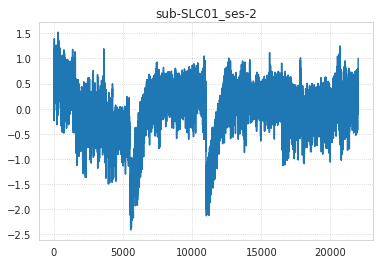

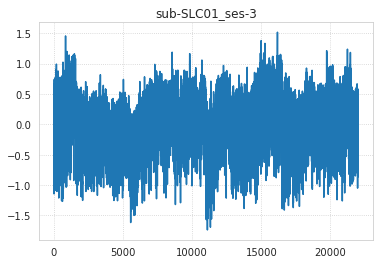

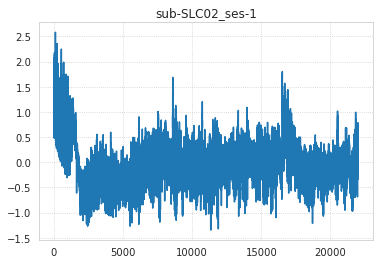

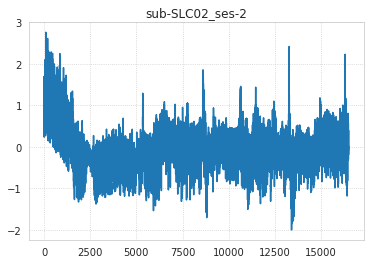

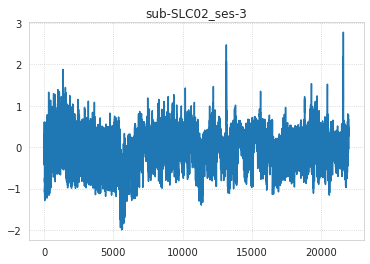

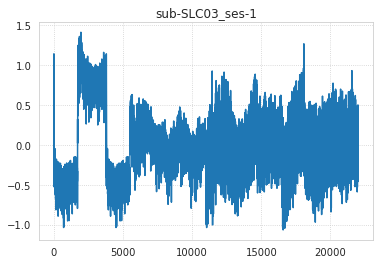

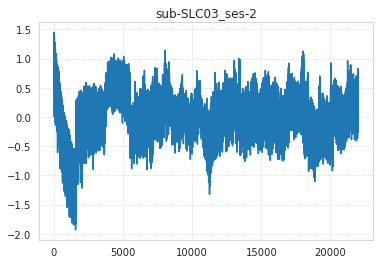

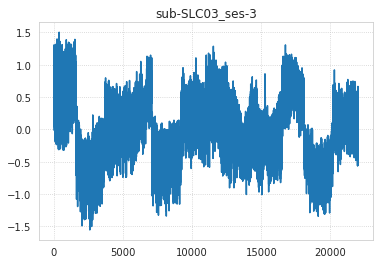

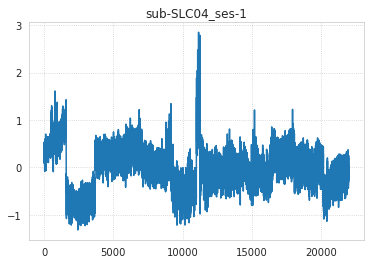

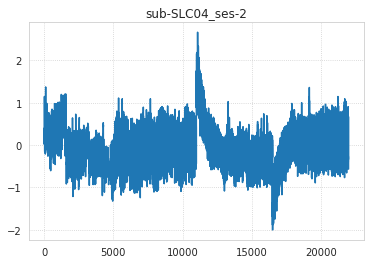

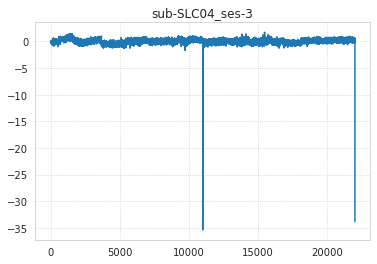

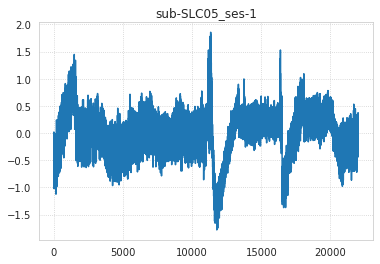

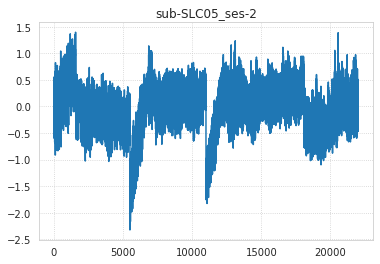

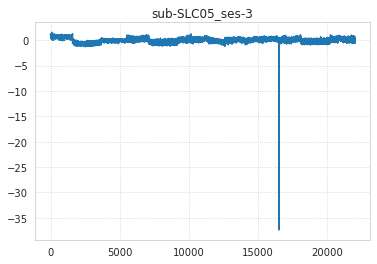

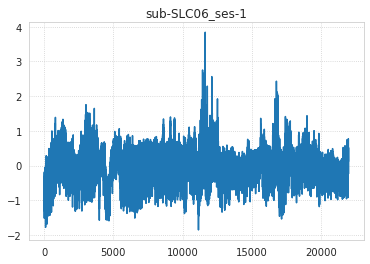

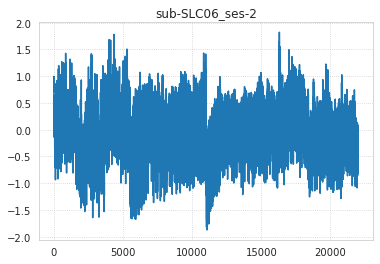

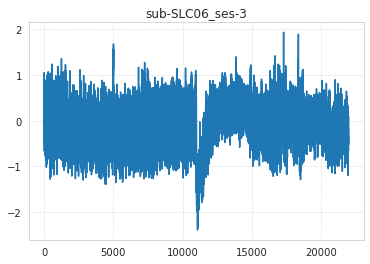

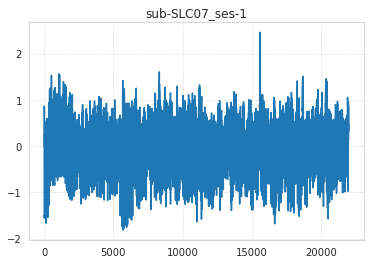

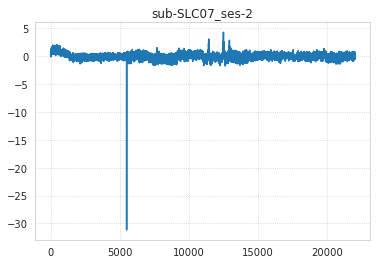

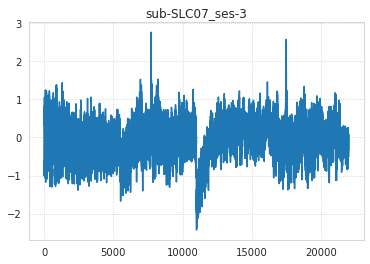

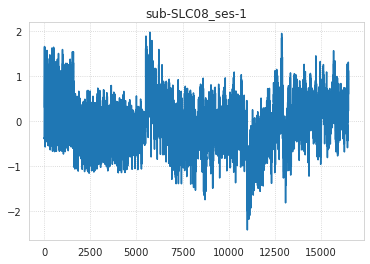

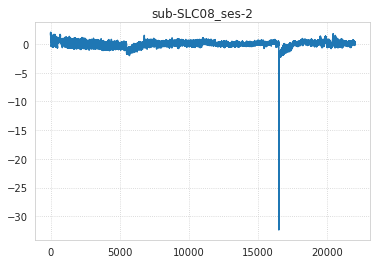

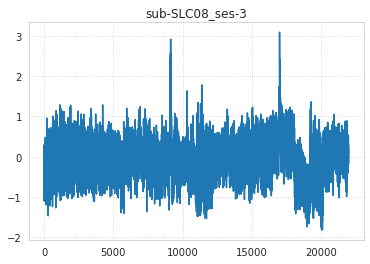

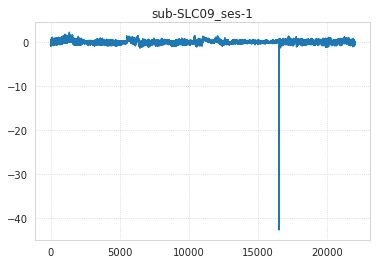

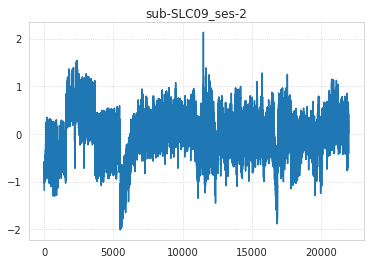

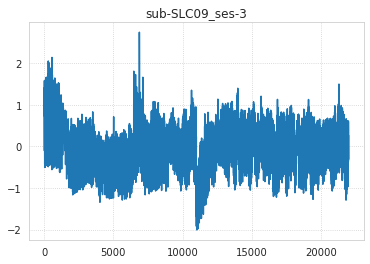

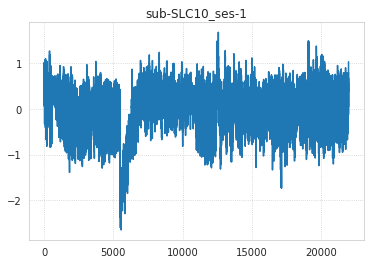

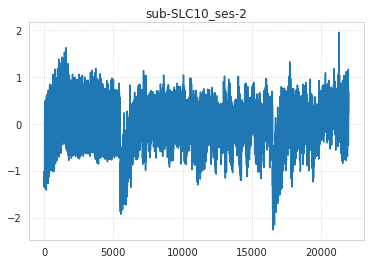

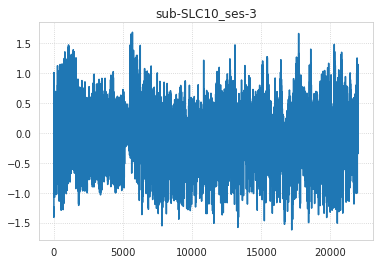

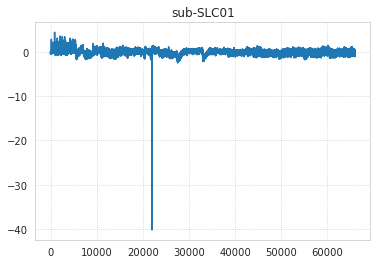

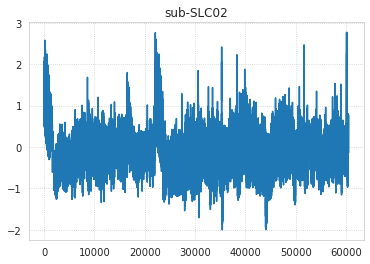

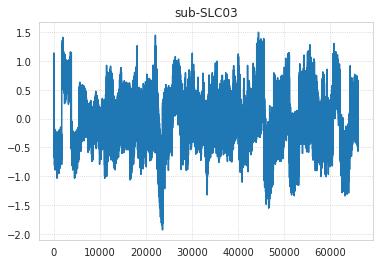

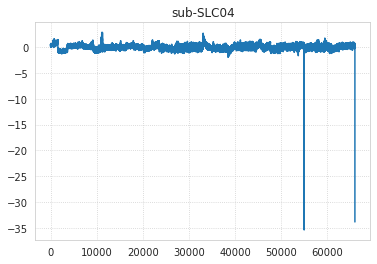

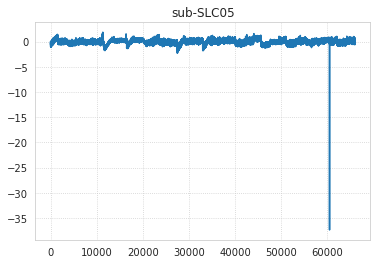

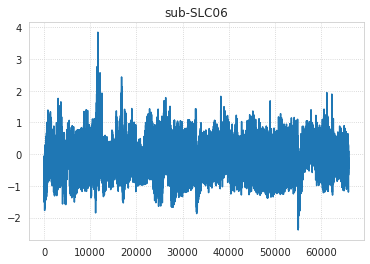

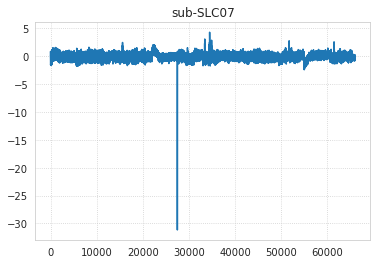

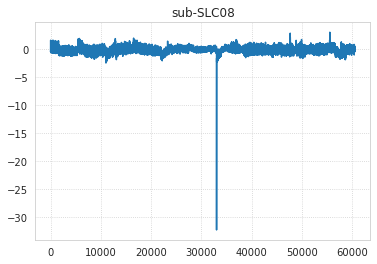

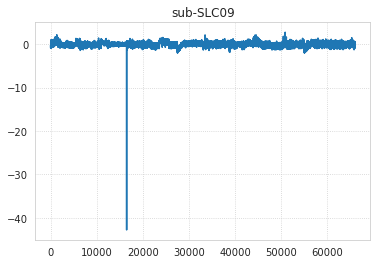

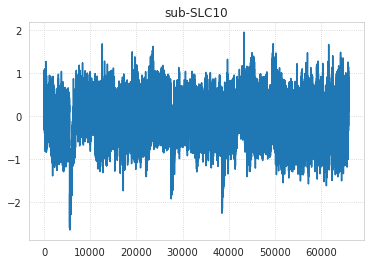

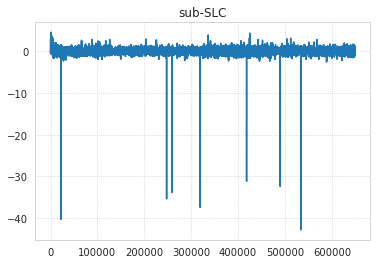

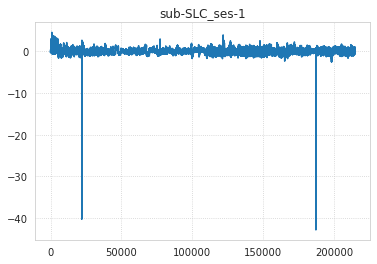

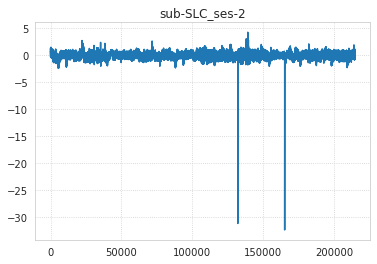

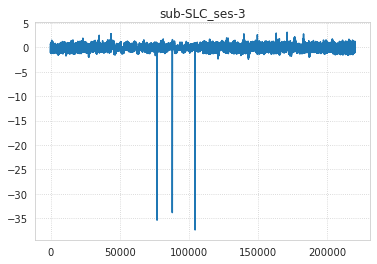

In [5]:
for key, func in mice.ca.items():
    plt.figure()
    plt.plot(np.nanmean(func.get_data(), 0))
    plt.title(key)
    plt.show()

In [4]:
func = mice.ca['sub-SLC07_ses-2_run-5']
a, p = sp_stats.spearmanr(func.get_data(), axis=1)

In [7]:
a[np.isnan(a)] = 0.
p[np.isnan(p)] = 1.
a[p >= 0.05] = 0.

In [8]:
a.shape

(302, 302)

<matplotlib.image.AxesImage object at 0x7fecc26a20a0>

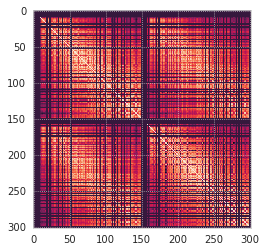

In [9]:
plt.imshow(a)

In [15]:
np.where(np.abs(a - a.T).sum(0) > 0)[0]

array([ 10,  11,  13,  14,  15,  16,  17,  21,  25,  27,  31,  32,  34,
        36,  38,  39,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,
        54,  55,  56,  57,  59,  60,  61,  63,  65,  66,  67,  68,  70,
        75,  79,  80,  81,  82,  84,  85,  86,  88,  90,  92,  96,  97,
        99, 102, 103, 104, 105, 106, 107, 108, 111, 113, 114, 115, 116,
       118, 119, 120, 121, 124, 125, 128, 129, 131, 132, 133, 134, 136,
       137, 138, 139, 140, 144, 145, 146, 147, 148, 158, 161, 162, 164,
       166, 167, 168, 169, 172, 176, 177, 178, 179, 180, 181, 182, 183,
       185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
       199, 201, 202, 203, 205, 207, 208, 209, 210, 211, 212, 213, 215,
       216, 217, 218, 219, 220, 221, 223, 225, 226, 227, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 239, 240, 241, 243, 245, 247, 249,
       252, 253, 257, 258, 259, 261, 262, 265, 266, 267, 271, 272, 275,
       277, 279, 282, 283, 287, 289, 290, 291, 292, 294, 295, 296, 297,
       298])

In [17]:
np.where(np.abs(a).sum(0) == 0)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  18,  20,
        22,  24,  30,  35,  40,  51,  53,  62,  77,  87,  91,  93,  95,
       100, 110, 112, 117, 122, 126, 135, 142, 150, 151, 152, 153, 154,
       155, 156, 157, 159, 160, 163, 171, 173, 175, 228, 238, 244, 251,
       254, 256, 263, 268, 273, 281, 284, 286, 288, 293, 299, 301])

[<matplotlib.lines.Line2D object at 0x7fecc1418a60>]

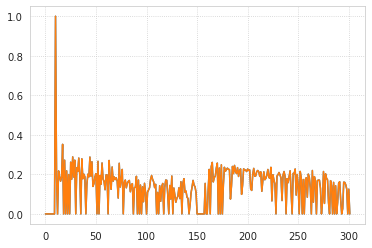

In [20]:
plt.plot(a[10])
plt.plot(a.T[10])

In [21]:
np.where(np.abs(a[10] - a.T[10]) > 0)

(
    array([ 13,  15,  16,  31,  32,  34,  38,  42,  43,  54,  55,  57,  59,
        60,  63,  65,  66,  67,  75,  82,  84,  86,  88,  97,  99, 103,
       104, 107, 108, 111, 115, 120, 124, 128, 129, 131, 133, 138, 139,
       140, 145, 147, 166, 167, 169, 176, 179, 181, 182, 185, 187, 188,
       189, 190, 191, 192, 195, 196, 198, 199, 203, 205, 207, 208, 209,
       210, 211, 212, 213, 218, 229, 230, 231, 232, 237, 239, 240, 241,
       245, 247, 249, 257, 259, 261, 267, 275, 277, 279, 282, 291, 298]),
)

In [23]:
a[10, 13], a[13, 10]

(0.21760498914427234, 0.21760498914427231)

<matplotlib.colorbar.Colorbar object at 0x7fec6805fe20>

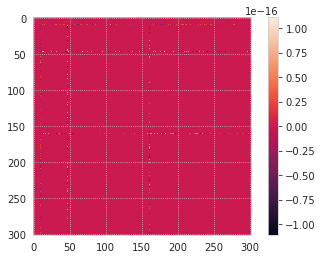

In [24]:
plt.imshow(a - a.T)
plt.colorbar()

<matplotlib.colorbar.Colorbar object at 0x7fec681462e0>

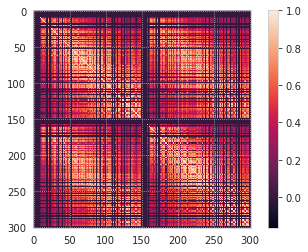

In [27]:
plt.imshow(b)
plt.colorbar()

In [28]:
(np.abs(a - b)).sum()

1.0283440765590512e-14

In [11]:
y = sp_dist.squareform(1 - a)

ValueError: Distance matrix 'X' must be symmetric.

In [29]:
percentiles = [5, 10, 15, 20, 30, 40]
percentiles = sorted(percentiles, reverse=True)

In [30]:
net = Network(mice, 'sub-SLC07_ses-2_run-5', 'ca2', 'rest', percentiles=percentiles)

In [31]:
_ = net.load_network()

In [36]:
(net.adj != (net.adj + net.adj.T) / 2).sum()

0

In [212]:
net.percentiles

[40, 30, 20, 15, 10, 5]

<matplotlib.image.AxesImage object at 0x7fe68ae82d60>

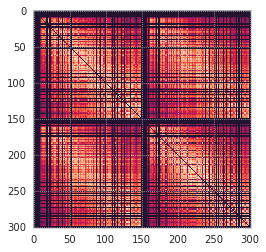

In [213]:
plt.imshow(net.adj)

In [214]:
net.data.shape

(302, 5500)

In [215]:
name = 'parcel2d-top'
reg_k = f"region-idxs_{name}"
nonzero_k = f"nonzero-idxs_{name}"

arr = np.zeros(mice.parcel[f"shape_{name}"] + (net.data.shape[-1],))

for t in tqdm(range(net.data.shape[-1])):
    if t > 1000 or t < 900:
        continue
    for node, lbl in net.n2l.items():
        ii = mice.parcel.encode(lbl)
        if ii in mice.parcel[reg_k]:
            ids = mice.parcel[reg_k][ii]
            ids = mice.parcel[nonzero_k][ids]
            arr[..., t].flat[ids] = net.data[node, t]

  0%|          | 0/5500 [00:00<?, ?it/s]

In [216]:
arr.shape

(1320, 1140, 5500)

In [217]:
xxx = arr[..., 900:1000]
np.nanmax(np.abs(xxx))

5.117308042719947

In [218]:
import ants

topview = 'topview_10um.nii.gz'
topview = pjoin(mice.cfg.base_dir, topview)
topview = ants.image_read(topview, pixeltype='unsigned int')
topview = topview.numpy()

flatmap = 'flatmap_10um.nii.gz'
flatmap = pjoin(mice.cfg.base_dir, flatmap)
flatmap = ants.image_read(flatmap, pixeltype='unsigned int')
flatmap = flatmap.numpy()

<matplotlib.colorbar.Colorbar object at 0x7fe68ad12940>

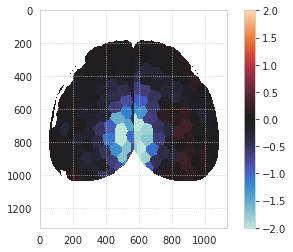

In [224]:
data2plt = xxx[..., 29]
# vminmax = np.nanmax(np.abs(data2plt))
data2plt = np.ma.masked_where(topview == 0, data2plt)
plt.imshow(data2plt, cmap='icefire', vmin=-2, vmax=2)
plt.colorbar()

[<matplotlib.lines.Line2D object at 0x7fe68a8571f0>]

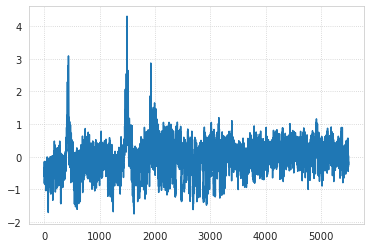

In [233]:
net.data[:, 100:9000].mean(0).shape

(5400,)

In [6]:
net.load_network()

<analysis.network.Network object at 0x7f11e1f02550>

<matplotlib.colorbar.Colorbar object at 0x7f11e20c2c10>

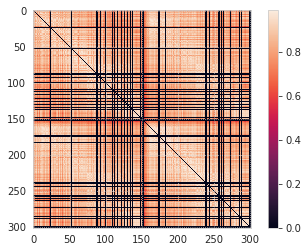

In [7]:
plt.imshow(net.adj)
plt.colorbar()

In [8]:
net.percentiles

[40, 30, 20, 15, 10, 5, 0]

In [9]:
net.thresholds

{
    40: 0.8525387221262998,
    30: 0.8755276277781043,
    20: 0.8994336017642965,
    15: 0.9123160348129686,
    10: 0.9262134833766494,
    5: 0.9435525234977404,
    0: 0.9895056331776114
}

<AxesSubplot:ylabel='Count'>

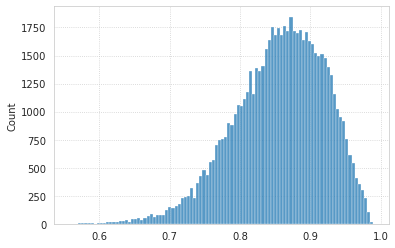

In [10]:
sns.histplot(net.adj[net.adj.nonzero()])

In [11]:
net._nonneg_perc()

100

In [ ]:
n-192*4_ca2_rest_pearson_

In [7]:
mice.setup_func_data('all')

In [9]:
ca

{
    'sub-SLC01_ses-1_run-1': <model.dataset.FuncData object at 0x7f705134fee0>,
    'sub-SLC01_ses-1_run-3': <model.dataset.FuncData object at 0x7f705134ff10>,
    'sub-SLC01_ses-1_run-5': <model.dataset.FuncData object at 0x7f7051353100>,
    'sub-SLC01_ses-1_run-7': <model.dataset.FuncData object at 0x7f7051353190>,
    'sub-SLC01_ses-2_run-1': <model.dataset.FuncData object at 0x7f7050564910>,
    'sub-SLC01_ses-2_run-3': <model.dataset.FuncData object at 0x7f7050564970>,
    'sub-SLC01_ses-2_run-5': <model.dataset.FuncData object at 0x7f7050564bb0>,
    'sub-SLC01_ses-2_run-7': <model.dataset.FuncData object at 0x7f7050564f10>,
    'sub-SLC01_ses-3_run-1': <model.dataset.FuncData object at 0x7f705131f280>,
    'sub-SLC01_ses-3_run-3': <model.dataset.FuncData object at 0x7f705131f490>,
    'sub-SLC01_ses-3_run-5': <model.dataset.FuncData object at 0x7f705131f670>,
    'sub-SLC01_ses-3_run-7': <model.dataset.FuncData object at 0x7f705131f910>,
    'sub-SLC02_ses-1_run-1': <model.dataset.FuncData object at 0x7f705131fcd0>,
    'sub-SLC02_ses-1_run-3': <model.dataset.FuncData object at 0x7f705131ff10>,
    'sub-SLC02_ses-1_run-5': <model.dataset.FuncData object at 0x7f705131fd30>,
    'sub-SLC02_ses-1_run-7': <model.dataset.FuncData object at 0x7f7051212310>,
    'sub-SLC02_ses-2_run-1': <model.dataset.FuncData object at 0x7f7051212730>,
    'sub-SLC02_ses-2_run-3': <model.dataset.FuncData object at 0x7f7051212970>,
    'sub-SLC02_ses-2_run-5': <model.dataset.FuncData object at 0x7f7051212af0>,
    'sub-SLC02_ses-3_run-1': <model.dataset.FuncData object at 0x7f705131f850>,
    'sub-SLC02_ses-3_run-3': <model.dataset.FuncData object at 0x7f705131faf0>,
    'sub-SLC02_ses-3_run-5': <model.dataset.FuncData object at 0x7f705131f250>,
    'sub-SLC02_ses-3_run-7': <model.dataset.FuncData object at 0x7f705131f220>,
    'sub-SLC03_ses-1_run-1': <model.dataset.FuncData object at 0x7f70513530a0>,
    'sub-SLC03_ses-1_run-2': <model.dataset.FuncData object at 0x7f70513530d0>,
    'sub-SLC03_ses-1_run-4': <model.dataset.FuncData object at 0x7f705134ff40>,
    'sub-SLC03_ses-1_run-6': <model.dataset.FuncData object at 0x7f7050564640>,
    'sub-SLC03_ses-2_run-1': <model.dataset.FuncData object at 0x7f7051212e20>,
    'sub-SLC03_ses-2_run-3': <model.dataset.FuncData object at 0x7f7051212850>,
    'sub-SLC03_ses-2_run-5': <model.dataset.FuncData object at 0x7f7051212100>,
    'sub-SLC03_ses-2_run-7': <model.dataset.FuncData object at 0x7f70512122e0>,
    'sub-SLC03_ses-3_run-1': <model.dataset.FuncData object at 0x7f70512121f0>,
    'sub-SLC03_ses-3_run-3': <model.dataset.FuncData object at 0x7f70512263d0>,
    'sub-SLC03_ses-3_run-5': <model.dataset.FuncData object at 0x7f70512265b0>,
    'sub-SLC03_ses-3_run-7': <model.dataset.FuncData object at 0x7f7051226850>,
    'sub-SLC04_ses-1_run-1': <model.dataset.FuncData object at 0x7f7051226c10>,
    'sub-SLC04_ses-1_run-3': <model.dataset.FuncData object at 0x7f7051226e50>,
    'sub-SLC04_ses-1_run-5': <model.dataset.FuncData object at 0x7f7051226c70>,
    'sub-SLC04_ses-1_run-7': <model.dataset.FuncData object at 0x7f7051242250>,
    'sub-SLC04_ses-2_run-1': <model.dataset.FuncData object at 0x7f70512269a0>,
    'sub-SLC04_ses-2_run-3': <model.dataset.FuncData object at 0x7f7051226f40>,
    'sub-SLC04_ses-2_run-5': <model.dataset.FuncData object at 0x7f7051226310>,
    'sub-SLC04_ses-2_run-7': <model.dataset.FuncData object at 0x7f7051226130>,
    'sub-SLC04_ses-3_run-1': <model.dataset.FuncData object at 0x7f705134ffd0>,
    'sub-SLC04_ses-3_run-3': <model.dataset.FuncData object at 0x7f70512260d0>,
    'sub-SLC04_ses-3_run-5': <model.dataset.FuncData object at 0x7f70512129a0>,
    'sub-SLC04_ses-3_run-7': <model.dataset.FuncData object at 0x7f7051212eb0>,
    'sub-SLC05_ses-1_run-1': <model.dataset.FuncData object at 0x7f70505648b0>,
    'sub-SLC05_ses-1_run-3': <model.dataset.FuncData object at 0x7f7050564550>,
    'sub-SLC05_ses-1_run-5': <model.dataset.FuncData object at 0x7f705131fd00>

In [3]:
net = Network(mice, 'sub-SLC06_ses-1', 'bold', 'rest')

In [4]:
net.fit_network(save=False)

[PROGRESS] fit: initiated

[PROGRESS] graphs: done

[PROGRESS] fit: done!

<analysis.network.Network object at 0x7f523db57220>

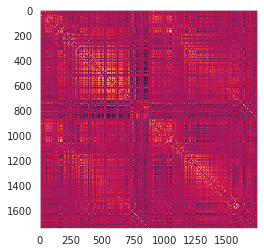

In [6]:
plt.imshow(net.adj)
plt.grid()

[<matplotlib.lines.Line2D object at 0x7f4dce750700>]

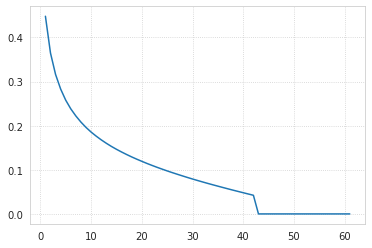

In [11]:
plt.plot(net.thresholds.keys(), net.thresholds.values())

<matplotlib.lines.Line2D object at 0x7f4dce07edc0>

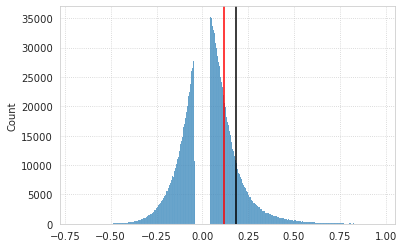

In [14]:
sns.histplot(net.adj[net.adj.nonzero()])
plt.axvline(net.thresholds[20], color='r', label='th at %20')
plt.axvline(net.thresholds[10], color='k', label='th at %10')

In [15]:
save_edgelist(net.graphs[10], 'test10', tmp_dir, True, sampler_kws={'n': 10, 'adj': 'p'})

[PROGRESS] 'test10.txt' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp

In [19]:
net.adj[0, 33], net.adj[0, 34]

(0.46964092901363597, 0.24432867491426344)

In [2]:
rng = get_rng(0)

In [3]:
g_src = nx.gnp_random_graph(100, 0.1, seed=0)

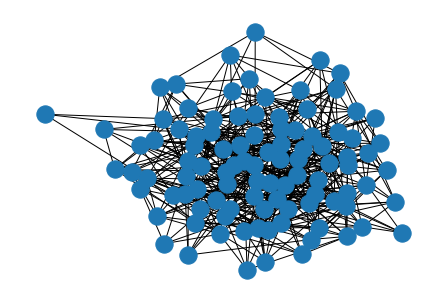

In [4]:
nx.draw(g_src)

<AxesSubplot:ylabel='Count'>

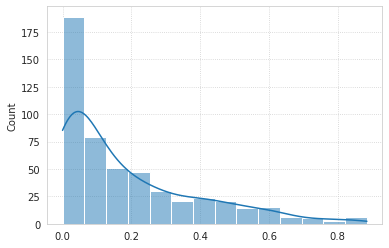

In [5]:
weights = rng.beta(0.5, 2, size=len(g_src.edges))
sns.histplot(weights, kde=True)

In [8]:
g_new = g_src.copy()
for w, (i, j, d) in zip(weights, g_new.edges(data=True)):
    d['weight'] = w

In [9]:
g_new.remove_edges_from([(a,b) for a, b, d in g_new.edges(data=True) if d["weight"] < 0.2])

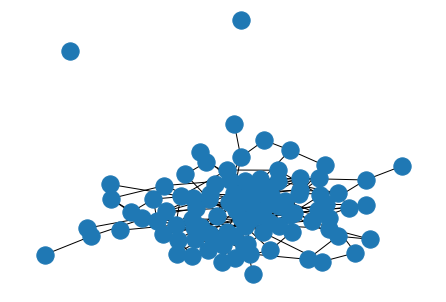

In [10]:
nx.draw(g_new)

<matplotlib.colorbar.Colorbar object at 0x7fa8c98e54f0>

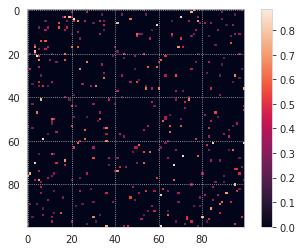

In [11]:
adj = nx.adjacency_matrix(g_new).toarray()
plt.imshow(adj)
plt.colorbar()

<AxesSubplot:ylabel='Count'>

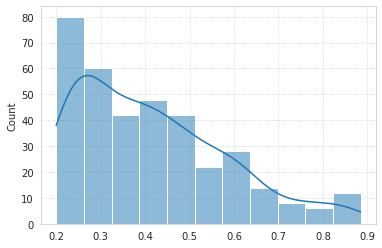

In [12]:
sns.histplot(adj[adj.nonzero()], kde=True)

In [20]:
def save_edgelist(
        g: nx.Graph,
        name: str,
        save_dir: str,
        weighted: bool = False,
        sampler: str = 'binomial',
        sampler_kws: dict = None,
        random_state: int = 42, ):

    adj = nx.adjacency_matrix(g).toarray()
    if weighted:
        rng = get_rng(random_state)
        sampler = getattr(rng, sampler)
        adj_kw = sampler_kws.pop('adj')
        sampler_kws[adj_kw] = adj
        counts = sampler(**sampler_kws)
    else:
        counts = adj.astype(bool).astype(int)

    edges = []
    for i, j in g.edges(data=False):
        edges.extend([(i, j)] * counts[i, j])
        edges.extend([(j, i)] * counts[i, j])
    return counts, edges

In [14]:
counts, edges = save_edgelist(g_new, 'test', 'test', False)

<matplotlib.image.AxesImage object at 0x7fa8c950f250>

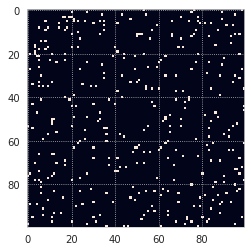

In [15]:
plt.imshow(counts)

In [16]:
edges

[
    (0, 53),
    (53, 0),
    (0, 76),
    (76, 0),
    (0, 98),
    (98, 0),
    (1, 20),
    (20, 1),
    (1, 27),
    (27, 1),
    (1, 75),
    (75, 1),
    (1, 89),
    (89, 1),
    (2, 34),
    (34, 2),
    (2, 43),
    (43, 2),
    (2, 54),
    (54, 2),
    (2, 95),
    (95, 2),
    (3, 16),
    (16, 3),
    (3, 17),
    (17, 3),
    (3, 19),
    (19, 3),
    (3, 20),
    (20, 3),
    (3, 70),
    (70, 3),
    (3, 78),
    (78, 3),
    (4, 21),
    (21, 4),
    (4, 47),
    (47, 4),
    (4, 89),
    (89, 4),
    (5, 8),
    (8, 5),
    (5, 18),
    (18, 5),
    (5, 21),
    (21, 5),
    (5, 23),
    (23, 5),
    (5, 26),
    (26, 5),
    (5, 33),
    (33, 5),
    (5, 35),
    (35, 5),
    (5, 66),
    (66, 5),
    (5, 74),
    (74, 5),
    (5, 78),
    (78, 5),
    (6, 14),
    (14, 6),
    (6, 30),
    (30, 6),
    (6, 41),
    (41, 6),
    (6, 79),
    (79, 6),
    (6, 81),
    (81, 6),
    (6, 84),
    (84, 6),
    (7, 35),
    (35, 7),
    (7, 59),
    (59, 7),
    (7, 91),
    (91, 7),
    (7, 94),
    (94, 7),
    (8, 9),
    (9, 8),
    (8, 14),
    (14, 8),
    (8, 18),
    (18, 8),
    (9, 17),
    (17, 9),
    (9, 35),
    (35, 9),
    (9, 57),
    (57, 9),
    (9, 77),
    (77, 9),
    (9, 87),
    (87, 9),
    (10, 23),
    (23, 10),
    (11, 20),
    (20, 11),
    (11, 33),
    (33, 11),
    (11, 50),
    (50, 11),
    (11, 51),
    (51, 11),
    (11, 52),
    (52, 11),
    (11, 66),
    (66, 11),
    (11, 76),
    (76, 11),
    (11, 95),
    (95, 11),
    (11, 97),
    (97, 11),
    (12, 50),
    (50, 12),
    (12, 66),
    (66, 12),
    (12, 75),
    (75, 12),
    (12, 83),
    (83, 12),
    (12, 93),
    (93, 12),
    (13, 24),
    (24, 13),
    (13, 56),
    (56, 13),
    (13, 70),
    (70, 13),
    (15, 93),
    (93, 15),
    (16, 86),
    (86, 16),
    (17, 20),
    (20, 17),
    (17, 23),
    (23, 17),
    (17, 40),
    (40, 17),
    (17, 69),
    (69, 17),
    (17, 71),
    (71, 17),
    (19, 41),
    (41, 19),
    (20, 44),
    (44, 20),
    (20, 53),
    (53, 20),
    (20, 78),
    (78, 20),
    (20, 97),
    (97, 20),
    (21, 39),
    (39, 21),
    (21, 49),
    (49, 21),
    (21, 63),
    (63, 21),
    (22, 44),
    (44, 22),
    (22, 90),
    (90, 22),
    (23, 61),
    (61, 23),
    (24, 27),
    (27, 24),
    (24, 60),
    (60, 24),
    (24, 77),
    (77, 24),
    (24, 83),
    (83, 24),
    (25, 34),
    (34, 25),
    (25, 89),
    (89, 25),
    (26, 55),
    (55, 26),
    (26, 59),
    (59, 26),
    (27, 49),
    (49, 27),
    (27, 75),
    (75, 27),
    (27, 98),
    (98, 27),
    (29, 35),
    (35, 29),
    (29, 82),
    (82, 29),
    (30, 43),
    (43, 30),
    (30, 63),
    (63, 30),
    (30, 68),
    (68, 30),
    (30, 88),
    (88, 30),
    (30, 95),
    (95, 30),
    (31, 35),
    (35, 31),
    (31, 97),
    (97, 31),
    (32, 51),
    (51, 32),
    (33, 47),
    (47, 33),
    (33, 50),
    (50, 33),
    (33, 94),
    (94, 33),
    (35, 54),
    (54, 35),
    (36, 54),
    (54, 36),
    (36, 57),
    (57, 36),
    (36, 60),
    (60, 36),
    (36, 84),
    (84, 36),
    (36, 99),
    (99, 36),
    (37, 41),
    (41, 37),
    (37, 68),
    (68, 37),
    (37, 71),
    (71, 37),
    (39, 88),
    (88, 39),
    (40, 43),
    (43, 40),
    (40, 74),
    (74, 40),
    (41, 68),
    (68, 41),
    (41, 74),
    (74, 41),
    (42, 57),
    (57, 42),
    (42, 72),
    (72, 42),
    (44, 58),
    (58, 44),
    (44, 99),
    (99, 44),
    (45, 72),
    (72, 45),
    (46, 99),
    (99, 46),
    (47, 86),
    (86, 47),
    (48, 65),
    (65, 48),
    (48, 81),
    (81, 48),
    (49, 63),
    (63, 49),
    (49, 87),
    (87, 49),
    (50, 63),
    (63, 50),
    (50, 70),
    (70, 50),
    (51, 62),
    (62, 51),
    (51, 84),
    (84, 51),
    (52, 96),
    (96, 52),
    (53, 55),
    (55, 53),
    (53, 65),
    (65, 53),
    (53, 70),
    (70, 53),
    (53, 94),
    (94, 53),
    (54, 83),
    (83, 54),
    (55, 92),
    (92, 55),
    (56, 65),
    (65, 56),
    (57, 90),
    (90, 57),
    (58, 8

In [17]:
len(edges), len(g_new.edges), len(g_src.edges)

(362, 181, 511)

In [21]:
counts, edges = save_edgelist(g_new, 'test', 'test', True, 'binomial', sampler_kws={'n': 10, 'adj': 'p'})

In [25]:
def save_edgelist(
		g: nx.Graph,
		name: str,
		save_dir: str,
		weighted: bool = False,
		sampler: str = 'binomial',
		sampler_kws: dict = None,
		random_state: int = 42, ):

[
    (0, 53),
    (0, 53),
    (0, 53),
    (53, 0),
    (53, 0),
    (53, 0),
    (0, 76),
    (0, 76),
    (0, 76),
    (0, 76),
    (0, 76),
    (0, 76),
    (0, 76),
    (76, 0),
    (76, 0),
    (76, 0),
    (76, 0),
    (76, 0),
    (76, 0),
    (76, 0),
    (0, 98),
    (0, 98),
    (0, 98),
    (0, 98),
    (0, 98),
    (98, 0),
    (98, 0),
    (98, 0),
    (98, 0),
    (98, 0),
    (1, 20),
    (1, 20),
    (1, 20),
    (1, 20),
    (20, 1),
    (20, 1),
    (20, 1),
    (20, 1),
    (1, 27),
    (1, 27),
    (27, 1),
    (27, 1),
    (1, 75),
    (1, 75),
    (1, 75),
    (1, 75),
    (1, 75),
    (75, 1),
    (75, 1),
    (75, 1),
    (75, 1),
    (75, 1),
    (1, 89),
    (1, 89),
    (1, 89),
    (1, 89),
    (89, 1),
    (89, 1),
    (89, 1),
    (89, 1),
    (2, 34),
    (2, 34),
    (2, 34),
    (34, 2),
    (34, 2),
    (34, 2),
    (2, 43),
    (43, 2),
    (2, 54),
    (2, 54),
    (54, 2),
    (54, 2),
    (2, 95),
    (2, 95),
    (95, 2),
    (95, 2),
    (3, 16),
    (3, 16),
    (3, 16),
    (3, 16),
    (3, 16),
    (16, 3),
    (16, 3),
    (16, 3),
    (16, 3),
    (16, 3),
    (3, 17),
    (3, 17),
    (3, 17),
    (3, 17),
    (3, 17),
    (3, 17),
    (17, 3),
    (17, 3),
    (17, 3),
    (17, 3),
    (17, 3),
    (17, 3),
    (3, 19),
    (3, 19),
    (3, 19),
    (3, 19),
    (3, 19),
    (3, 19),
    (3, 19),
    (19, 3),
    (19, 3),
    (19, 3),
    (19, 3),
    (19, 3),
    (19, 3),
    (19, 3),
    (3, 20),
    (3, 20),
    (3, 20),
    (20, 3),
    (20, 3),
    (20, 3),
    (3, 70),
    (3, 70),
    (3, 70),
    (3, 70),
    (3, 70),
    (3, 70),
    (3, 70),
    (3, 70),
    (3, 70),
    (70, 3),
    (70, 3),
    (70, 3),
    (70, 3),
    (70, 3),
    (70, 3),
    (70, 3),
    (70, 3),
    (70, 3),
    (3, 78),
    (3, 78),
    (3, 78),
    (3, 78),
    (78, 3),
    (78, 3),
    (78, 3),
    (78, 3),
    (4, 21),
    (4, 21),
    (4, 21),
    (4, 21),
    (4, 21),
    (4, 21),
    (4, 21),
    (4, 21),
    (4, 21),
    (4, 21),
    (21, 4),
    (21, 4),
    (21, 4),
    (21, 4),
    (21, 4),
    (21, 4),
    (21, 4),
    (21, 4),
    (21, 4),
    (21, 4),
    (4, 47),
    (4, 47),
    (4, 47),
    (4, 47),
    (4, 47),
    (47, 4),
    (47, 4),
    (47, 4),
    (47, 4),
    (47, 4),
    (4, 89),
    (4, 89),
    (4, 89),
    (89, 4),
    (89, 4),
    (89, 4),
    (5, 8),
    (5, 8),
    (5, 8),
    (8, 5),
    (8, 5),
    (8, 5),
    (5, 18),
    (5, 18),
    (18, 5),
    (18, 5),
    (5, 21),
    (5, 21),
    (5, 21),
    (5, 21),
    (5, 21),
    (5, 21),
    (5, 21),
    (5, 21),
    (21, 5),
    (21, 5),
    (21, 5),
    (21, 5),
    (21, 5),
    (21, 5),
    (21, 5),
    (21, 5),
    (5, 23),
    (5, 23),
    (5, 23),
    (5, 23),
    (5, 23),
    (23, 5),
    (23, 5),
    (23, 5),
    (23, 5),
    (23, 5),
    (5, 26),
    (5, 26),
    (5, 26),
    (5, 26),
    (5, 26),
    (5, 26),
    (26, 5),
    (26, 5),
    (26, 5),
    (26, 5),
    (26, 5),
    (26, 5),
    (5, 33),
    (5, 33),
    (5, 33),
    (33, 5),
    (33, 5),
    (33, 5),
    (5, 35),
    (5, 35),
    (5, 35),
    (35, 5),
    (35, 5),
    (35, 5),
    (5, 74),
    (5, 74),
    (74, 5),
    (74, 5),
    (5, 78),
    (5, 78),
    (5, 78),
    (5, 78),
    (5, 78),
    (5, 78),
    (78, 5),
    (78, 5),
    (78, 5),
    (78, 5),
    (78, 5),
    (78, 5),
    (6, 14),
    (6, 14),
    (6, 14),
    (6, 14),
    (14, 6),
    (14, 6),
    (14, 6),
    (14, 6),
    (6, 30),
    (6, 30),
    (6, 30),
    (6, 30),
    (6, 30),
    (30, 6),
    (30, 6),
    (30, 6),
    (30, 6),
    (30, 6),
    (6, 41),
    (6, 41),
    (6, 41),
    (6, 41),
    (6, 41),
    (6, 41),
    (6, 41),
    (6, 41),
    (41, 6),
    (41, 6),
    (41, 6),
    (41, 6),
    (41, 6),
    (41, 6),
    (41, 6),
    (41, 6),
    (6, 79),
    (6, 79),
    (79, 6),
    (79, 6),
    (6, 81),
    (6, 81),
    (6, 81),
    (6, 81),
    (81, 6),
    (81, 6),
    (81, 6),
    (81, 6),
    (6, 84),
    (6, 84),
    (84, 6),
    (84, 6),
    (7, 35),
    (7, 35),


In [ ]:
		name = f"{name}-sample.txt"
name = f"{name}-binary.txt"

<matplotlib.colorbar.Colorbar object at 0x7fa8c947a190>

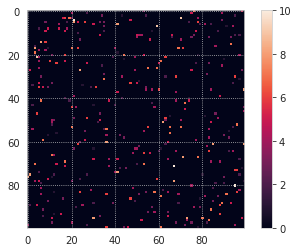

In [23]:
plt.imshow(counts)
plt.colorbar()

In [24]:
len(edges), len(g_new.edges), len(g_src.edges)

(1484, 181, 511)

In [105]:
n = 10

counts = rng.binomial(10, adj)
ratios = counts / 10

# for src, tgt, d in g.edges(data=True):
    

<matplotlib.colorbar.Colorbar object at 0x7f7d9aff72b0>

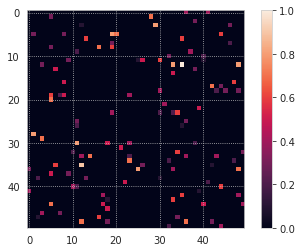

In [106]:
plt.imshow(ratios)
plt.colorbar()

<matplotlib.colorbar.Colorbar object at 0x7f7d9af21820>

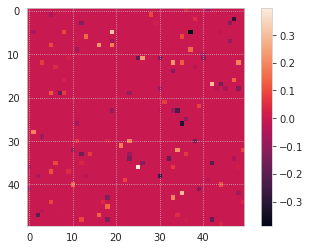

In [107]:
plt.imshow(ratios - adj)
plt.colorbar()

<AxesSubplot:ylabel='Count'>

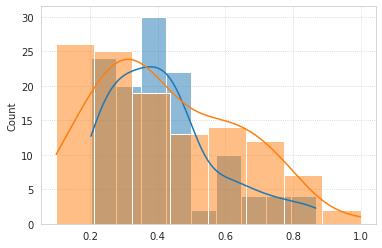

In [108]:
sns.histplot(adj[adj.nonzero()], kde=True)
sns.histplot(ratios[ratios.nonzero()], kde=True, color='C1')

<AxesSubplot:ylabel='Count'>

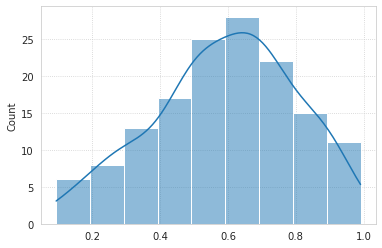

In [136]:
weights = rng.beta(2.5, 2, size=len(g.edges))
sns.histplot(weights, kde=True)

In [137]:
for w, (i, j, d) in zip(weights, g.edges(data=True)):
    d['weight'] = 0.0

for w, (i, j, d) in zip(weights, g.edges(data=True)):
    d['weight'] = w if w > 0.6 else 0.0

<matplotlib.colorbar.Colorbar object at 0x7f7d9a345880>

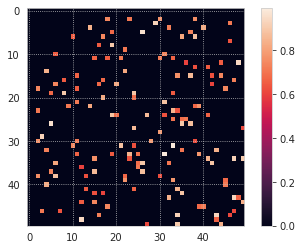

In [138]:
adj = nx.adjacency_matrix(g).toarray()
plt.imshow(adj)
plt.colorbar()

<AxesSubplot:ylabel='Count'>

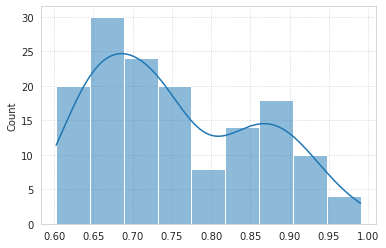

In [139]:
sns.histplot(adj[adj.nonzero()], kde=True)

In [140]:
n = 10

counts = rng.binomial(10, adj)
ratios = counts / 10

In [148]:
counts.nonzero()

(
    array([ 2,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  7,
        8,  8,  9, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19,
       19, 19, 20, 20, 21, 21, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 26, 26, 26, 27, 27, 28, 29, 30, 30, 30, 30, 31, 31,
       31, 31, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35,
       35, 35, 35, 35, 36, 36, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39,
       40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45,
       46, 46, 46, 47, 47, 47, 47, 48, 48, 49, 49, 49]),
    array([18, 23, 30, 38, 29, 46, 14, 32, 40, 19, 26, 37, 10, 17, 35, 38, 46,
       16, 19, 22,  6, 31, 15, 18, 21, 30, 33, 36, 44, 48, 38, 41,  4, 22,
       11, 34, 37, 42, 44,  8, 17, 47,  6, 16, 20, 42,  2, 11, 45,  5,  8,
       24, 33, 17, 24, 11, 31,  9, 14, 38, 39,  2, 33, 34, 19, 20, 27, 31,
       41, 33, 35, 36,  5, 35, 37, 24, 49, 30,  3,  2, 11, 28, 38, 10, 21,
       24, 33,  4, 35, 43, 11, 19, 23, 25, 31, 39, 15, 23, 41, 47, 49,  6,
       25, 26, 32, 42, 12, 25,  5, 15, 26,  2,  6, 13, 22, 30, 22, 33, 45,
        4, 45, 13, 24, 34, 15, 17, 35, 32, 47, 48, 12, 15, 49, 18, 39, 40,
        3,  7, 47, 16, 34, 43, 46, 12, 43, 27, 34, 44])
)

In [151]:
[(1, 2)] * 0

[]

<matplotlib.colorbar.Colorbar object at 0x7f7d9a077340>

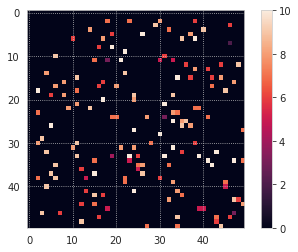

In [147]:
plt.imshow(counts)
plt.colorbar()

<matplotlib.colorbar.Colorbar object at 0x7f7d9a27ea00>

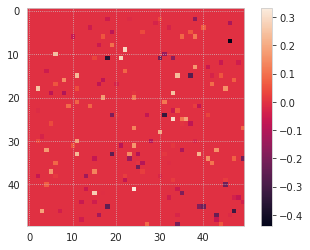

In [142]:
plt.imshow(ratios - adj)
plt.colorbar()

<AxesSubplot:ylabel='Count'>

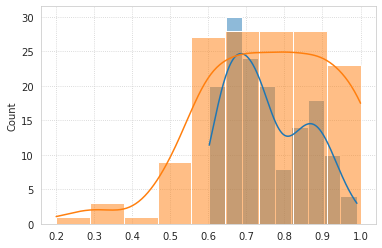

In [143]:
sns.histplot(adj[adj.nonzero()], kde=True)
sns.histplot(ratios[ratios.nonzero()], kde=True, color='C1')

In [146]:
sampler = getattr(rng, 'poisson')

In [ ]:
sampler()

In [52]:


edges = []
for src, tgt, d in g.edges(data=True):
    edges.append((src, tgt))
    edges.append((tgt, src))

In [61]:

rng.binomial(10, 0.7)

8

In [2]:
%%time

mice = Mice((192, 4), full_load=True, load_allen=True)

ROI lookup not found, time to run organize func.

combine metadata not found, time to run cat_data() . . .

CPU times: user 3.67 s, sys: 1.32 s, total: 4.99 s
Wall time: 6.69 s


[PROGRESS] fit columnar: initiated

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

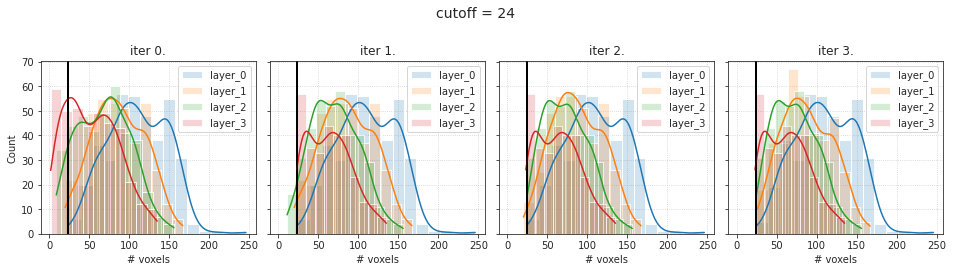

[PROGRESS] merge: done

Warning, region '127' is flat

[PROGRESS] erode: done

num regions,    left: 719,  right: 719
region id diff,         r - l:  Counter({768: 719})

[PROGRESS] fit columnar: done

[PROGRESS] 'meta_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'cortex-raw_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'cortex-eroded_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'cortex-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'merged-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'top-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'merged-ids_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-192*4/parcellation

[PROGRESS] save results: done.

CPU times: user 3h 2min 23s, sys: 17min 34s, total: 3h 19min 58s
Wall time: 26min 49s


In [3]:
%%time

mice.parcel.fit_parcel(True, cutoff=3)

In [4]:
%%time

mice = Mice((192, 4), full_load=True, load_allen=True, load_parcel=True)

ROI lookup not found, time to run organize func.

combine metadata not found, time to run cat_data() . . .

CPU times: user 3.41 s, sys: 1.15 s, total: 4.56 s
Wall time: 6.13 s


In [5]:
from register.register import Register
reg = Register(mice)
reg.register_anat(True)

registering anat sub-SLC10_ses-3: 100%|██████████| 30/30 [15:25<00:00, 30.85s/it]


/home/hadi/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



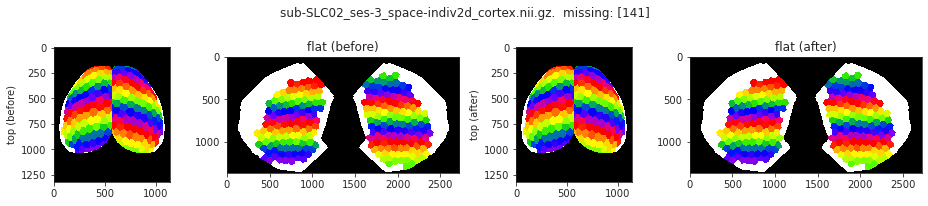

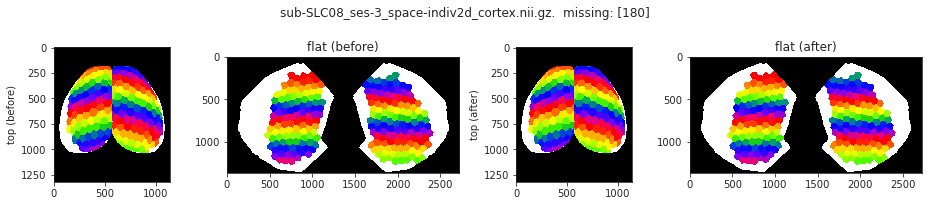

In [6]:
mice.parcel.fill_rois_2d()

## New graph saving function?

- Previous saving works, so no need to fix
- Just add the sampling approach and you're done

In [3]:
%timeit Mice((128, 2))

1.15 s ± 81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
list(mice.parcel.results)

[
    'radius',
    'cutoff',
    'shape_parcel2d-flat',
    'shape_parcel2d-top',
    'shape_parcel3d',
    'nonzero-idxs_parcel2d-flat',
    'nonzero-idxs_parcel2d-top',
    'nonzero-idxs_parcel3d',
    'region-idxs_parcel2d-flat',
    'region-idxs_parcel2d-top',
    'region-idxs_parcel3d'
]

In [6]:
%%time

mice.setup_func_data()

CPU times: user 225 ms, sys: 121 ms, total: 346 ms
Wall time: 374 ms


## Hier Ca

In [2]:
mice = Mice((192, 4))

In [3]:
hier = Hierarchical(mice, 'sub-SLC', 'ca2', metric='spearman').fit_hierarchical(range(3, 11))

In [4]:
list(hier.results)

[3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
pi_disjoint = np.zeros((len(hier.results), len(hier.n2l)), dtype='uint32')

for i, (n_clust, result_d) in enumerate(hier.results.items()):
    for oc_idx, clist in result_d['cluster_assigns'].items():
        for lbl in clist:
            node = hier.l2n[lbl]
            pi_disjoint[i, node] = oc_idx

In [6]:
proj = hier.project_vec(pi_disjoint)

In [7]:
import ants

topview = 'topview_10um.nii.gz'
topview = pjoin(mice.cfg.base_dir, topview)
topview = ants.image_read(topview, pixeltype='unsigned int')
topview = topview.numpy()

flatmap = 'flatmap_10um.nii.gz'
flatmap = pjoin(mice.cfg.base_dir, flatmap)
flatmap = ants.image_read(flatmap, pixeltype='unsigned int')
flatmap = flatmap.numpy()

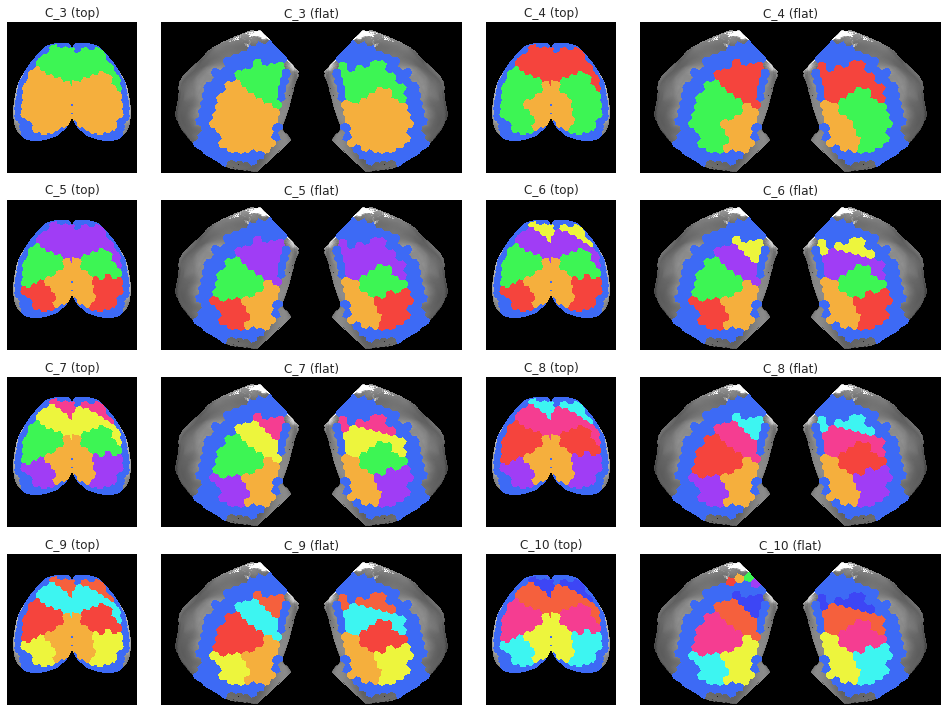

In [8]:
ncols = 4
nrows = int(np.ceil(len(hier.results) / (ncols / 2)))
fig, axes = create_figure(nrows, ncols, (13.5, 2.5 * nrows), gridspec_kw={'width_ratios': [1, 2, 1, 2]})

min_thres = 0.1

for i, n_clust in enumerate(hier.results):
    cmap = get_cluster_cmap(range(n_clust))
    data_top = proj['parcel2d-top'][i]
    data_flat = proj['parcel2d-flat'][i]

    data2plt = np.ma.masked_where(data_top < min_thres, data_top)
    ax = axes.ravel()[i * 2]
    ax.imshow(topview, cmap='Greys_r')
    ax.imshow(data2plt, cmap=cmap)
    ax.set_title(f"C_{n_clust} (top)")

    data2plt = np.ma.masked_where(data_flat < min_thres, data_flat)
    ax = axes.ravel()[i * 2 + 1]
    ax.imshow(flatmap, cmap='Greys_r')
    ax.imshow(data2plt, cmap=cmap)
    ax.set_title(f"C_{n_clust} (flat)")

trim_axs(axes, 2 * len(hier.results))
remove_ticks(axes)
plt.show()

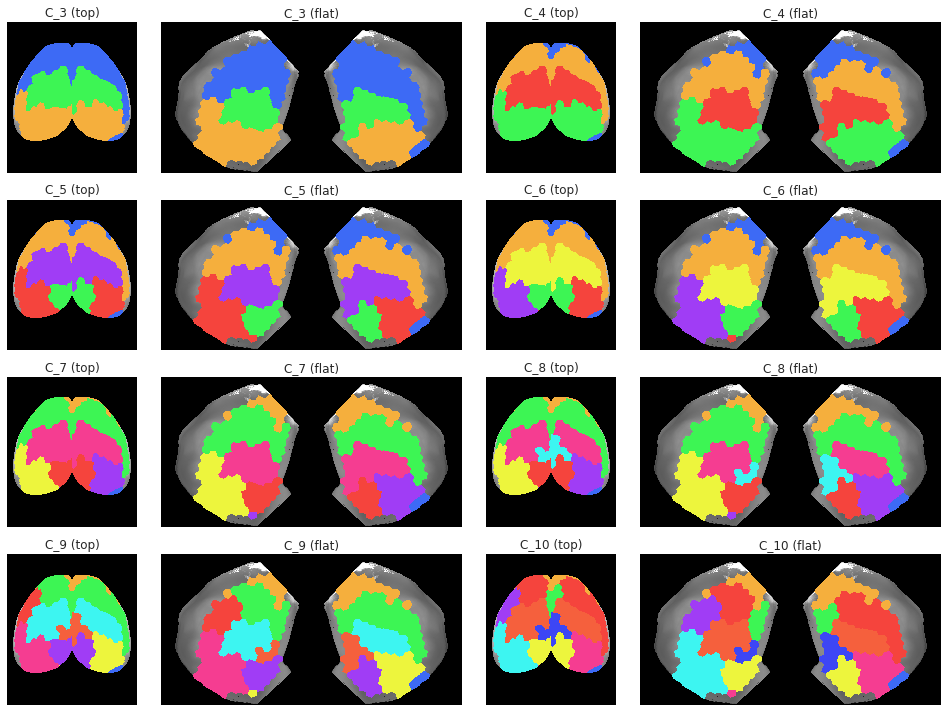

## Hier BOLD

In [7]:
hier = Hierarchical(mice, 'sub-SLC', 'bold').fit_hierarchical(range(3, 11))

In [8]:
pi_disjoint = np.zeros((len(hier.results), len(hier.n2l)), dtype='uint32')

for i, (n_clust, result_d) in enumerate(hier.results.items()):
    for oc_idx, clist in result_d['cluster_assigns'].items():
        for lbl in clist:
            node = hier.l2n[lbl]
            pi_disjoint[i, node] = oc_idx

In [9]:
proj = hier.project_vec(pi_disjoint)

In [10]:
list(proj)

['parcel3d']

In [12]:
proj['parcel3d'][1].shape

(1320, 800, 1140)

<matplotlib.image.AxesImage object at 0x7f8100437370>

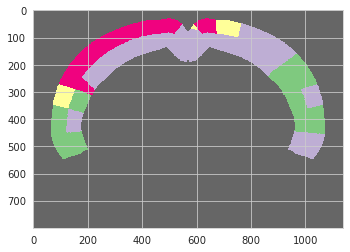

In [22]:
plt.imshow(proj['parcel3d'][1][660], cmap='Accent_r')

<matplotlib.image.AxesImage object at 0x7f7f99244520>

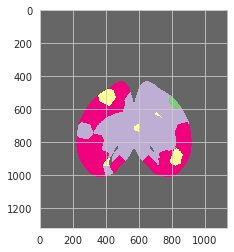

In [29]:
plt.imshow(proj['parcel3d'][1][:, 100, :], cmap='Accent_r')

In [14]:
min_thres = 0.1

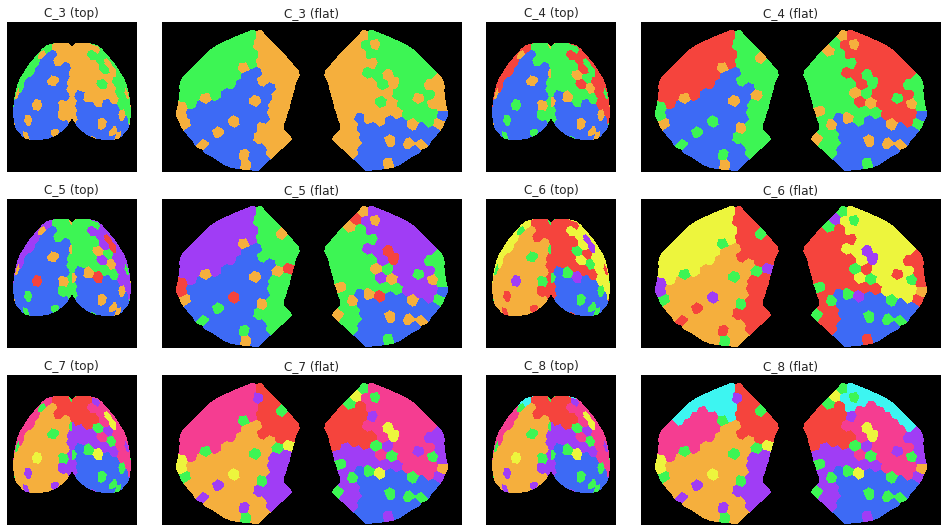

In [15]:
ncols = 4
nrows = int(np.ceil(len(hier.results) / (ncols / 2)))
fig, axes = create_figure(nrows, ncols, (13.5, 2.5 * nrows), gridspec_kw={'width_ratios': [1, 2, 1, 2]})

for i, n_clust in enumerate(hier.results):
    cmap = get_cluster_cmap(range(n_clust))
    data_top = proj['parcel2d-top'][i]
    data_flat = proj['parcel2d-flat'][i]

    data2plt = np.ma.masked_where(data_top < min_thres, data_top)
    ax = axes.ravel()[i * 2]
    ax.imshow(topview, cmap='Greys_r')
    ax.imshow(data2plt, cmap=cmap)
    ax.set_title(f"C_{n_clust} (top)")

    data2plt = np.ma.masked_where(data_flat < min_thres, data_flat)
    ax = axes.ravel()[i * 2 + 1]
    ax.imshow(flatmap, cmap='Greys_r')
    ax.imshow(data2plt, cmap=cmap)
    ax.set_title(f"C_{n_clust} (flat)")

trim_axs(axes, 2 * len(hier.results))
remove_ticks(axes)
plt.show()

In [ ]:
plt.imshow(proj['parcel3d'][400])

In [ ]:
%%time

net_ca = Network(
    mice=mice,
    key='sub-SLC',
    df=mice.ca_dfs['sub-SLC'],
    percentiles=np.linspace(50, 1, 50),
).fit_network(save=False)

In [ ]:
%%time

net_bold = Network(
    mice=mice,
    key='sub-SLC',
    df=mice.bold_dfs['sub-SLC'],
    percentiles=np.linspace(50, 1, 50),
).fit_network(save=False)

In [ ]:
sns.histplot(net_ca.adj[net_ca.adj.nonzero()], color='C0', alpha=0.5, stat='density')
plt.axvline(net_ca.thresholds[10], color='g', ls='--')
plt.axvline(net_ca.thresholds[5], color='r', ls='--')

sns.histplot(net_bold.adj[net_bold.adj.nonzero()], color='C1', alpha=0.5, stat='density')
plt.axvline(net_bold.thresholds[10], color='g', ls=':')
plt.axvline(net_bold.thresholds[5], color='r', ls=':')

plt.show()

In [ ]:
x = mice.ca_dfs['sub-SLC'].values
x.shape

In [ ]:
nans = np.where(np.isnan(x).sum(0) > 0)[0]
x = np.delete(x, nans, axis=1)
x.shape

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(
    n_components=100,
    svd_solver='full',
).fit(x)

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
pca.components_.shape

In [ ]:
y = pca.transform(x)
y.shape

In [ ]:
plt.plot(y[:, 0])

In [ ]:
np.where(y[:, 0] > 100)[0]

In [ ]:
i = 21999
plt.imshow(x[i-150:i+150].T)

In [ ]:
i = 21999
plt.imshow(x[i-10:i+10].T, aspect=0.2)
plt.colorbar()

In [ ]:
plt.plot(np.abs(x).mean(-1))

In [ ]:
z = y.copy()
z[:, 0] = 0

x_inv = pca.inverse_transform(z)
x_inv.shape

In [ ]:
df_new = pd.DataFrame(x_inv)
df_new.shape

In [ ]:
a, p = get_adj_mat(df_new, 'pearson')

In [ ]:
plt.imshow(a)
plt.colorbar()

In [ ]:
plt.imshow(net_ca.adj)
plt.colorbar()

In [ ]:
sns.histplot(net_ca.adj[net_ca.adj.nonzero()], color='C0', alpha=0.5, stat='density')
plt.axvline(net_ca.thresholds[10], color='g', ls='--')
plt.axvline(net_ca.thresholds[5], color='r', ls='--')

sns.histplot(a[a.nonzero()], color='C5', alpha=0.5, stat='density')
plt.axvline(net_ca.thresholds[10], color='g', ls='--')
plt.axvline(net_ca.thresholds[5], color='r', ls='--')

In [ ]:
plt.imshow(a)
plt.colorbar()

In [ ]:
th = np.quantile(a.ravel(), q=0.8)

a_gsr = a.copy()
a_gsr[a > th] = 1.0
a_gsr[a <= th] = 0.0

In [ ]:
th = np.quantile(net_ca.adj.ravel(), q=0.8)

a_full = net_ca.adj.copy()
a_full[net_ca.adj > th] = 1.0
a_full[net_ca.adj <= th] = 0.0

In [ ]:
plt.imshow(a_gsr)

In [ ]:
plt.imshow(a_full)

In [ ]:
a_full2 = np.delete(np.delete(a_full, nans, axis=0), nans, axis=1)

In [ ]:
plt.imshow(a_full2)

In [ ]:
df = mice.ca_dfs['sub-SLC'].copy()
df[df.isnull()] = 0

In [ ]:
df

In [ ]:
hier = Hierarchical(mice, 'sub-SLC', df)

In [ ]:
hier.fit(5)

In [ ]:
_ = hier.fit(7)

In [ ]:
hier.results[7]['cluster_assigns']

In [ ]:
"""cluster_assigns = hier.results[5]['cluster_assigns']
cluster_assigns = {
    c_idx: [
        mice.parcel.encode(*tuple(map(
            lambda string: int(string),
            net_ca.n2l[e].split('-'))))
        for e in c_list]
    for c_idx, c_list in cluster_assigns.items()
}
cluster_assigns"""

In [ ]:
_ = hier.fit(7)

In [ ]:
results = get_pdist(, 'correlation')

In [ ]:
list(results)

In [ ]:
results['y']

In [ ]:
x = mice.ca_dfs['sub-SLC01_ses-1_run-1'].values
x = np.ma.masked_where(~np.isfinite(x), x)
x.shape

In [ ]:
y = sp_dist.pdist(x.T, metric='correlation')

In [ ]:
y, len(y)

In [ ]:
from nancorrmp.nancorrmp import NaNCorrMp

In [ ]:
mice.ca_dfs['sub-SLC01_ses-1_run-1'].reset_index(drop=True).to_dict().items()

In [ ]:
a = NaNCorrMp.calculate,(x)

In [ ]:
a.shape

In [ ]:
plt.imshow(a)

In [ ]:
from analysis.hierarchical import sp_hier


In [ ]:
yy = results['y'].copy()
yy = np.ma.masked_where(~np.isfinite(yy), yy)
sp_hier.linkage(yy)

In [ ]:
y = results['y'].copy()
np.isfinite(y)

In [ ]:
sp_hier.linkage(np.random.randn(10))

In [ ]:
net.thresholds

In [ ]:
plt.imshow(net.adjacencies[31], cmap=net.style['cmap'])
plt.colorbar()

In [ ]:
list(net.adjacencies)

In [ ]:
x = net.adjacencies[10].copy()
x[x.nonzero()] = 1
plt.imshow(x, cmap=net.style['cmap'])
plt.show()

In [ ]:
plt.imshow(net.adjacencies[10], cmap=net.style['cmap'])
plt.show()

In [ ]:
plt.imshow(net.adjacencies[10], cmap=net.style['cmap'])
plt.show()

In [ ]:
list(net.l2n)[:15]

In [ ]:
plt.imshow(net.adjacencies[10][:15][:, :15], cmap=net.style['cmap'])
plt.show()

In [ ]:
net.set_percentiles(np.linspace(39, 1, 39), fit=False)

In [ ]:
net._apply_thresholds()

In [ ]:
net.thresholds

In [ ]:
sns.histplot(net.adj[net.adj.nonzero()], color='C0')
plt.axvline(net.thresholds[10], color='g', ls='--')
plt.axvline(net.thresholds[5], color='r', ls='--')

In [ ]:
x = net.adjacencies[25].copy()
x[x.nonzero()] = 1
plt.imshow(x, cmap=net.style['cmap'])
plt.show()

In [ ]:
df_stim = mice.load_stim_times('ca2')
df_stim

In [ ]:
_df = df_stim.loc[df_stim['stim'] == 1]
_df = _df[_df['task'].values == 'rest']
_df

In [ ]:
_df['key'].unique()

In [ ]:
df_stim = mice.load_stim_times('bold')
df_stim

In [ ]:
save_obj(dfs, 'test_ca', tmp_dir, 'npy')

In [ ]:
list(dfs)

In [ ]:
dfs['sub-SLC08_ses-2_run-6']

In [ ]:
x = dfs['sub-SLC08_ses-2_run-6'].corr()
x = x.values
np.fill_diagonal(x, 0.)

In [ ]:
plt.imshow(x)

In [ ]:
x.shape

In [ ]:
a, p = get_adj_mat(dfs['sub-SLC08_ses-2_run-6'], 'pearson')
aa, pp = get_adj_mat(dfs['sub-SLC08_ses-2_run-6'], 'spearman')

In [ ]:
idxs_pears = np.where(np.abs(a).sum(0) == 0)[0]
idxs_spear = np.where(np.abs(aa).sum(0) == 0)[0]

In [ ]:
a.shape, aa.shape

In [ ]:
fig, axes = create_figure(1, 2, (12, 4.5))

vminmax = np.max(np.abs(a))
im = axes[0].imshow(a, cmap='bwr', vmin=-vminmax, vmax=vminmax)
plt.colorbar(im, ax=axes[0])

vminmax = np.max(np.abs(aa))
im = axes[1].imshow(aa, cmap='bwr', vmin=-vminmax, vmax=vminmax)
plt.colorbar(im, ax=axes[1])

In [ ]:
sns.histplot(a[a.nonzero()], color='C0', alpha=0.5)
sns.histplot(aa[aa.nonzero()], color='C1', alpha=0.5)

In [ ]:
node_labels = dfs['sub-SLC08_ses-2_run-6'].columns.values

In [ ]:
node_labels

In [ ]:
n2l = {i: lbl for i, lbl in enumerate(node_labels)}
l2n = {lbl: i for i, lbl in n2l.items()}

In [ ]:
n2l

In [ ]:
dfs = mice.make_dfs('ca2')

In [ ]:
y = dfs['sub-SLC08_ses-2_run-6'].corr()
y = y.values
np.fill_diagonal(y, 0.)

In [ ]:
plt.imshow(y)

In [ ]:
np.isnan(y).sum(1)

In [ ]:
aaa = np.where(np.isnan(y).sum(1) > 100)[0]
aaa

In [ ]:
bbb = dfs['sub-SLC08_ses-2_run-6'].columns[aaa]
bbb

In [ ]:
ca_func = mice.ca['sub-SLC08_ses-2_run-6'].get_data()

In [ ]:
{k: v for k, v in ca_func.items() if k in bbb}

In [ ]:
sns.histplot(perc_missing.values())

In [ ]:
mice.setup_func_data()

In [ ]:
x = mice.ca['sub-SLC01_ses-2_run-3'].get_data()

In [ ]:
list(x)

In [ ]:
def _reindex_fn(s):
    vals = tuple(map(lambda e: int(e), s.split('-')))
    i = int(vals[0] * 2e9) + vals[-1]
    if len(vals) == 3:
        i += int(vals[1] * 10)
    return i + int(6e6 / len(vals))

In [ ]:
sorted(x, key=_reindex_fn)

In [ ]:
from register.register import Register
reg = Register(mice)

In [ ]:
reg.organize_func(0.1)

In [ ]:
reg.set_mode('3d')
acc = reg.get_accepted_regions(0.1)
{k: len(v) for k, v in acc.items()}

In [ ]:
cor3d = acc['cortex-merged']

In [ ]:
reg.set_mode('2d')
acc2 = reg.get_accepted_regions(0.1)
{k: len(v) for k, v in acc2.items()}

cor2d = acc2['cortex-merged']

In [ ]:
[i for i in cor2d if i not in cor3d]

In [ ]:
thres = 0.1

regions_all = {}
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        key = mice.get_key(sub, ses)
        mask = mice.mask3d[key].load_ants('unsigned int')
        mask = mask.numpy().astype(bool)
        obj = reg.load_obj_masks(key)
        x = obj['cortex-merged'].numpy()
        x *= mask
        regions = np.unique(x[x.nonzero()])
        regions_all[key] = sorted(regions)

regions_agg = []
for item in regions_all.values():
    regions_agg += item
freq = collections.Counter(regions_agg)
freq = {
    i: v / len(regions_all)
    for i, v in freq.items()
}
freq = {
    i: freq.get(i, 0.0) for i in
    mice.parcel.complement(list(freq))
}

rej = dict(filter(
    lambda t: t[1] < thres,
    freq.items()
))
rej = mice.parcel.complement(sorted(rej))
acc = [
    i for i in freq
    if i not in rej
]

msg = '\n\n'
msg += f"Name: {'cortex-merged'} . . . a total of {len(acc)} regions were accepted.\n"
msg += f"accept ratio: {100 * len(acc) / len(freq):0.0f} %, "
msg += f"reject ratio: {100 * len(rej) / len(freq):0.0f} %, "
msg += f"using a presence threshold of {0.1 * 100} %\n"

print(msg)

In [ ]:
sns.ecdfplot(freq.values())

In [ ]:

list(obj)

In [ ]:
regions_all = {}


In [ ]:
from register.register import Register
reg = Register(mice)

In [ ]:
reg.register_anat(True)

In [ ]:
reg.organize_func()

In [ ]:
path = '/home/hadi/Documents/workspaces/allen/MouseConnectivity/cortical_coordinates'
sorted(os.listdir(path))

In [ ]:
laplacian, laplacian_header = nrrd.read(pjoin(path, 'laplacian_10.nrrd'))

In [ ]:
laplacian.shape

In [ ]:
laplacian_header

In [ ]:
plt.imshow(laplacian[600], cmap='turbo')

In [ ]:
boundary, boundary_header = nrrd.read(pjoin(path, 'isocortex_boundary_10.nrrd'))

In [ ]:
import h5py

In [ ]:
with h5py.File(pjoin(path, 'top_view_paths_10.h5'), 'r') as f:
    paths = np.array(f['paths'])
    view = np.array(f['view lookup'])
paths.shape, view.shape

In [ ]:
plt.imshow(view)
plt.colorbar()

In [ ]:
with h5py.File(pjoin(path, 'dorsal_flatmap_paths_10.h5'), 'r') as f:
    dorsal_paths = np.array(f['paths'])
    dorsal_view = np.array(f['view lookup'])
dorsal_paths.shape, dorsal_view.shape

In [ ]:
plt.imshow(dorsal_view)